# 爬虫获取前程无忧数据分析师职位信息

## 一、获取数据

In [6]:
import requests
from bs4 import  BeautifulSoup
import xlwt
headers={
'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.75 Safari/537.36'
}
def get_html():
    k=1 #参数k代表存储到excel的行数
    wb = xlwt.Workbook()  # 创建工作簿
    f = wb.add_sheet("招聘信息")  # 创建工作表
    '''
    下方的循环是将Excel表格中第一行固定
    Excel表第一行的前五列分别对应 职位、公司、工作地点、薪水、发布日期
    '''
    raw = ['职位', '公司', '工作地点', '薪水', '发布日期']
    for i in range(len(raw)):
        f.write(0, i, raw[i])
        '''
        write函数中第一个参数表示存储到多少行
        第二各参数存储到多少列表，第三个参数代表存储到对应行列的值
        '''
    url='http://search.51job.com/list/000000,000000,0000,00,9,99,数据分析师,2,{}.html'
    try:
        for page in range(1,205):#循环解析分页
            res = requests.get(url.format(page))
            res.encoding = 'gbk'
            if res.status_code == 200:
                soup = BeautifulSoup(res.text, 'lxml')
                t1 = soup.select('.t1 span a')
                t2 = soup.select('.t2 a')
                t3 = soup.select('.t3')
                t4 = soup.select('.t4')
                t5 = soup.select('.t5')
                for i in range(len(t2)):
                    job = t1[i].get('title')#获取职位
                    href = t2[i].get('href')#获取链接
                    company = t2[i].get('title')#获取公司名
                    location = t3[i+1].text#获取工作地点
                    salary = t4[i+1].text#获取薪水
                    date = t5[i+1].text#获取发布日期
                    print(job + " " + company + " " + location + " " + salary + " " + date + " " + href)
                    f.write(k,0,job)
                    f.write(k,1,company)
                    f.write(k,2,location)
                    f.write(k,3,salary)
                    f.write(k,4,date)
                    k+=1#每存储一行 k值加1
        wb.save('招聘.csv')#写完后掉用save方法进行保存
    except TimeoutError:
        print("请求失败")
        return  None
if __name__=='__main__':
    get_html()

数据分析师 爱德威软件开发（上海）有限公司 上海 1-1.5万/月 03-15 http://jobs.51job.com/all/co547815.html
数据分析师 杭州朗通信息技术有限公司 杭州-余杭区 1.5-2万/月 03-15 http://jobs.51job.com/all/co2652671.html
数据分析师 深圳市野格传媒有限公司 深圳-福田区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4654396.html
游戏数据分析师 湖南省沃尔信息技术有限公司 长沙-岳麓区 6-8千/月 03-15 http://jobs.51job.com/all/co2556861.html
数据分析师（德国喜宝） 广州市妥善生物科技有限公司 广州-天河区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2584356.html
数据分析师 新华信（SINOTRUST） 上海-黄浦区 6.5-8.5千/月 03-15 http://jobs.51job.com/all/co4845848.html
数据分析师 深圳市利晟资产管理集团有限公司 深圳 4-6千/月 03-15 http://jobs.51job.com/all/co4719180.html
商品数据分析师 热风投资有限公司 上海 4.5-6千/月 03-15 http://career.hotwind.net/
数据分析师 精锐教育南京分公司 南京-鼓楼区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2612652.html
数据分析师 北京路盟科技有限公司 北京 1-3万/月 03-15 http://jobs.51job.com/all/co2669943.html
数据分析师 深圳市宜安延保售后管理股份有限公司 深圳-福田区 0.8-1万/月 03-15 http://jobs.51job.com/all/co1425353.html
数据分析师 世纪畅链有限责任公司 北京 1-1.5万/月 03-15 http://jobs.51job.com/all/co4188700.html
薪酬数据分析师 尚励信息技术（上海）有限公司 上海-浦东新区 6-8千/月 03-1

数据分析师 深圳市三希软件科技有限公司 深圳-福田区 0.5-1万/月 03-15 http://jobs.51job.com/all/co3313579.html
高级数据分析师/市场研究员 成都锐理数据处理技术股份有限公司 烟台 2.5-4千/月 03-15 http://jobs.51job.com/all/co2192789.html
Data Analyst (数据分析师) 艾美仕中国 IMS Health 北京-东城区 1-2万/月 03-15 http://jobs.51job.com/all/co1371642.html
数据分析师 平安普惠企业管理有限公司重庆分公司 重庆-江北区 6-8千/月 03-15 http://jobs.51job.com/all/co2748636.html
数据分析师 郑州福睦机械设备有限公司 郑州-高新区 3-5千/月 03-15 http://jobs.51job.com/all/co4092923.html
数据分析师/数据运营 上海众谱伟信金融信息服务有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3336691.html
数据分析师 包食宿180314 上海航傲信息科技有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 广州渠道汇通信息科技有限公司 广州-白云区 5-8千/月 03-15 http://jobs.51job.com/all/co4715914.html
数据分析师 苏州盛域机电设备有限公司 苏州 3-4.5千/月 03-15 http://jobs.51job.com/all/co3357582.html
数据分析师 网舟联合科技（北京）有限公司 成都-青羊区 5-8千/月 03-15 http://jobs.51job.com/all/co3668735.html
Python数据分析师 北京经世万方信息技术有限公司 北京-朝阳区 10-15万/年 03-15 http://jobs.51job.com/all/co2770372.html
数据分析师 上海高欣计算机系统有限公司 上海-浦东新区 1-2万/月 03-15 http://jobs.51job.c

数据分析师 北京大米未来科技有限公司 北京 0.8-1万/月 03-15 http://jobs.51job.com/all/co3207168.html
数据分析师 北京微影时代科技有限公司 北京-朝阳区 1.5-1.8万/月 03-15 http://jobs.51job.com/all/co3371186.html
数据分析师（催收） 上海牛圆网络科技有限公司 上海-黄浦区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4747485.html
数据分析师 一米辅导-移动互联网教育 上海 1-1.5万/月 03-15 http://jobs.51job.com/all/co3622213.html
数据分析师 福建慧舟信息科技有限公司 福州-晋安区 4-6千/月 03-15 http://jobs.51job.com/all/co2567488.html
数据分析师 湖南巨景证券投资顾问有限公司广州分公司 广州-番禺区 4-6千/月 03-15 http://jobs.51job.com/all/co4865585.html
初级数据分析师 西安数之元网络科技有限公司 北京-朝阳区 0.4-1万/月 03-15 http://jobs.51job.com/all/co3877918.html
数据分析师 深圳优拓特科技有限公司 深圳-龙华新区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4587546.html
BI数据分析师： 运去哪 上海 0.8-1万/月 03-15 http://jobs.51job.com/all/co2774053.html
数据分析师 卡尔玛港口机械（深圳）有限公司 深圳-南山区 0.8-1.3万/月 03-15 http://jobs.51job.com/all/co637252.html
数据分析师 上海普资金融信息服务股份有限公司 上海-浦东新区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co3360046.html
数据分析师 柏荟国际医疗集团 上海 2-2.5万/月 03-15 http://jobs.51job.com/all/co2847701.html
数据分析师/研究员 河南王牌企划有

数据分析师/助理 重庆好奇堂游戏有限公司 西安 4.5-6千/月 03-15 http://jobs.51job.com/all/co4852309.html
数据分析师 上海古道商务咨询有限公司 上海-静安区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2734096.html
数据分析师（Python方向） 荐客极聘网络技术（苏州）有限公司 北京-朝阳区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4594774.html
数据分析师 重庆展智企业营销策划有限公司 重庆-渝北区 4-7千/月 03-15 http://jobs.51job.com/all/co4835474.html
数据分析师 南京烽火星空通信发展有限公司 乌鲁木齐 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3208550.html
腾讯应用数据分析师工程师/助理 大连摩比维迪视频系统有限公司 沈阳 3-5千/月 03-15 http://jobs.51job.com/all/co3829114.html
数据分析师 绎达咨询（成都）股份有限公司 成都-高新区 3.5-7千/月 03-15 http://jobs.51job.com/all/co2015310.html
数据分析师 广州新东方学校 广州 5-8千/月 03-15 http://jobs.51job.com/all/co726263.html
运营数据分析师 北京缀新网络技术有限公司 北京-海淀区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3905764.html
电商数据分析师 桂林爱索家居用品股份有限公司 桂林 3-8千/月 03-15 http://jobs.51job.com/all/co2886923.html
广告数据分析师 上海狂热网络科技有限公司 上海-浦东新区 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3028546.html
医疗数据分析师 成都中联信息产业有限公司 成都-高新区 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co2547637.ht

数据分析师 优志愿 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3577837.html
广告商业数据分析师 梨视频 上海-静安区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4490719.html
数据分析师（数据可视化） 上海大岂网络科技有限公司 上海-徐汇区 1-2万/月 03-15 http://jobs.51job.com/all/co3703777.html
数据分析师 上海国鑫安盈金融信息服务有限公司 上海-闵行区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4076282.html
海外广告数据分析师-OI01-004 英雄互娱科技股份有限公司 北京-朝阳区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4772950.html
数据分析师 好孩子（中国）商贸有限公司 昆山 4-6千/月 03-15 http://jobs.51job.com/all/co2573266.html
数据分析师助理 上海融万网络科技有限公司 上海-徐汇区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4409170.html
数据分析师 安徽汇驿信息科技有限公司 合肥 1-1.5万/月 03-15 http://jobs.51job.com/all/co2841403.html
数据分析师 作业盒子 北京-朝阳区 2-4万/月 03-15 http://jobs.51job.com/all/co3524862.html
数据分析师（可接受实习生） 杭州炼数科技有限公司 杭州-江干区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4867493.html
数据分析师 上海柏为电子科技有限公司 上海-普陀区 1-2万/月 03-15 http://jobs.51job.com/all/co2396106.html
数据分析师 网娱互动科技（北京）股份有限公司 北京 6-8千/月 03-15 http://jobs.51job.com/all/co2252416.html
数据分析师 杭州远眺科技有限公司 杭州-余杭区 40-

数据分析师 上海协谷信息科技有限公司 上海-黄浦区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4676076.html
信贷数据分析师 乾康（上海）金融信息服务股份有限公司 上海 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co3016826.html
数据分析师（大数据风控） 上海一米投资管理有限公司 深圳-南山区 1.5-3万/月 03-15 http://jobs.51job.com/all/co4453325.html
数据分析师 成都狮之吼科技有限公司 成都-高新区 4-6千/月 03-15 http://jobs.51job.com/all/co3352885.html
网店数据分析师（包工作餐） 广州麦嗨信息科技有限公司 广州-白云区 0.5-1.2万/月 03-15 http://jobs.51job.com/all/co4444408.html
数据分析师/数据统计管理 北京精英影视文化有限责任公司 北京-朝阳区 6-8千/月 03-15 http://jobs.51job.com/all/co2652570.html
美团大众点评——数据分析师 美团-大众点评 上海-长宁区 1.2-2万/月 03-15 http://jobs.51job.com/all/co4022612.html
数据分析师 广州市裕超医疗器械有限公司 广州-天河区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4413524.html
数据分析师 花生金融 上海-静安区 0.6-1万/月 03-15 http://jobs.51job.com/all/co3698273.html
新媒体数据分析师 福建有点内容文化传媒有限公司 福州-仓山区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4042538.html
数据分析师 上海南燕信息技术有限公司 上海-静安区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4137580.html
数据分析师 远孚物流集团有限公司 上海 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co38501

数据分析师 深圳先健互联网金融医疗有限公司 深圳-南山区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co3802848.html
数据分析师 四川省爱恋珠宝有限公司 成都 4-6千/月 03-15 http://jobs.51job.com/all/co2824189.html
大数据分析师 诺莱仕（上海）企业发展有限公司 上海-静安区 5-7千/月 03-15 http://jobs.51job.com/all/co3232933.html
数据分析师 北京羽实箫恩信息技术股份有限公司 深圳-福田区 0.6-1万/月 03-15 http://jobs.51job.com/all/co3752527.html
数据分析师 上海惊鹭互联网金融信息服务有限公司 上海-黄浦区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4538727.html
数据分析师 游族网络 上海-徐汇区 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co2284274.html
催收高级数据分析师 7贷金融 深圳-福田区 1.2-1.8万/月 03-15 http://jobs.51job.com/all/co4282438.html
高级数据分析师（数据挖掘方向） 郑州珑凌科技有限公司 郑州-金水区 6-8千/月 03-15 http://jobs.51job.com/all/co2821130.html
数据分析师 (Contractor) 徕卡显微系统（上海）贸易有限公司 上海 1-1.5万/月 03-15 http://jobs.51job.com/all/co3725289.html
数据分析师 青海春天药用资源科技股份有限公司 成都 1.2-2万/月 03-15 http://jobs.51job.com/all/co2463319.html
数据分析师 上海蓝蛙展览展示有限公司 上海-黄浦区 0.8-1万/月 03-15 http://jobs.51job.com/all/co2742724.html
数据分析师 杭州旦悦科技有限公司-abc360 杭州-滨江区 0.6-1万/月 03-15 http://jobs.51job.com/all/co32

数据分析师 跑哪儿科技（北京）有限公司 成都-高新区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4030508.html
资深数据分析师 上海你我贷互联网金融信息服务有限公司 上海 1.5-2万/月 03-15 http://jobs.51job.com/all/co2614553.html
数据分析师 春秋航空股份有限公司 上海 1.5-2.5万/月 03-15 http://jobs.51job.com/all/co2511759.html
BI数据分析师J10137 微贷（杭州）金融信息服务有限公司 杭州-江干区 1-2万/月 03-15 http://jobs.51job.com/all/co2512300.html
数据分析师 锦江区秋野原服饰店 成都-武侯区 3.5-7千/月 03-15 http://jobs.51job.com/all/co2954014.html
BPO数据分析师 苏州星智达管理咨询有限公司 苏州 4-5.5千/月 03-15 http://jobs.51job.com/all/co2549159.html
高级运营数据分析师 时空电动汽车股份有限公司 杭州-西湖区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3150491.html
财务数据分析师 重庆市九龙坡区壹心壹教育培训学校 重庆 3-6千/月 03-15 http://jobs.51job.com/all/co3364330.html
数据分析师 讯汇科技（广州）有限公司 广州-天河区 0.8-1万/月 03-15 http://jobs.51job.com/all/co2318693.html
高级数据分析师 深圳市小草互联网金融服务有限公司 广州 1-5万/月 03-15 http://jobs.51job.com/all/co3877130.html
数据分析师 商赢电子商务有限公司 上海-奉贤区 0.8-1万/月 03-15 http://jobs.51job.com/all/co3622617.html
电商数据分析师 深圳罗马仕科技有限公司 深圳 0.9-1.8万/月 03-15 http://jobs.51job.com/all/co2606202.html
数据分析师 掌

数据分析师 上海冥晨网络科技有限公司 上海-静安区 6-8千/月 03-15 http://jobs.51job.com/all/co3499890.html
数据分析师/分析员 湖北楚安建筑工程有限公司 合肥 6-8千/月 03-15 http://jobs.51job.com/all/co4698571.html
中级数据分析师 深圳赫美智慧科技有限公司 深圳-福田区 0.7-1万/月 03-15 http://jobs.51job.com/all/co3329054.html
数据分析师（深圳） 深圳市永兴元科技股份有限公司 深圳-南山区 6-9千/月 03-15 http://jobs.51job.com/all/co346935.html
数据分析师 晶能生物技术（上海）有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2377217.html
高级数据分析师 重庆森鑫炬科技有限公司 异地招聘 1-1.5万/月 03-15 http://jobs.51job.com/all/co2134711.html
数据分析师 广州泰达保安服务有限公司越秀分公司 广州-天河区 0.5-1万/月 03-15 http://jobs.51job.com/all/co3749132.html
数据分析师 广州淳享信息科技有限公司 广州-天河区 0.5-1万/月 03-15 http://jobs.51job.com/all/co4077549.html
数据分析师 上海海晏威固国际贸易有限公司 上海 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co534804.html
数据分析师（大数据方向） 广州卡宝宝互联网金融信息服务股份有限公司 广州-天河区 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co2338089.html
数据分析师/商品专员 南京凯莉米洛服饰有限公司 南京-江宁区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3736079.html
数据分析师 上海电科智能系统股份有限公司 上海-普陀区 6-8千/月 03-15 http://jobs.51job.com/all/co326

数据分析师 北京京师励耘教育科技有限公司 北京-海淀区 6-9千/月 03-15 http://jobs.51job.com/all/co2236253.html
数据分析师 广州瓷妆化妆品有限公司 广州-番禺区 0.5-1万/月 03-15 http://jobs.51job.com/all/co3648136.html
数据分析师 苏州思杰马克丁软件有限公司 苏州 0.8-1万/月 03-15 http://jobs.51job.com/all/co2384159.html
数据分析师 南京瀚和软件技术有限公司 南京 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co2634677.html
数据分析师 上海先烁信息科技有限公司 上海 1-1.7万/月 03-15 http://jobs.51job.com/all/co3052624.html
数据分析师 浙江土拨鼠网络科技有限公司 深圳-宝安区 1-2万/月 03-15 http://jobs.51job.com/all/co2681172.html
数据分析师/数据挖掘分析师 北京德瑞信通科技有限公司 广州-天河区 6-8千/月 03-15 http://jobs.51job.com/all/co2740406.html
高级数据分析师（外企 五险一金） 上海贝塔斯曼商业服务有限公司 无锡-滨湖区 6-8千/月 03-15 http://jobs.51job.com/all/co2034042.html
高级数据分析师 福建牛大师网络科技有限公司 福州-台江区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4737745.html
数据分析师 鞍山易升科技有限公司 鞍山 4-8千/月 03-15 http://jobs.51job.com/all/co4903411.html
财务数据分析师 创业软件股份有限公司 杭州-滨江区 1-1.5万/月 03-15 http://jobs.51job.com/all/co290053.html
初中级游戏数据分析师 深圳市创想天空科技股份有限公司 深圳-福田区 4.5-8千/月 03-15 http://jobs.51job.com/all/co2601502.html
数据分析师 深圳

数据分析师 无锡市希杰餐饮管理有限公司 无锡-无锡新区 3-6千/月 03-15 http://jobs.51job.com/all/co4632635.html
数据分析师 广州飞猪网络科技有限公司 广州-天河区 0.7-1.4万/月 03-15 http://jobs.51job.com/all/co4066912.html
高级数据分析师 美的集团 佛山-顺德区 30-40万/年 03-15 http://jobs.51job.com/all/co156465.html
数据分析师 曼迪匹艾（北京）科技服务有限公司 北京-通州区 0.6-1万/月 03-15 http://jobs.51job.com/all/co2708441.html
数据分析师 成都蚂蚁搬家有限责任公司 成都-高新区 2.2-3千/月 03-15 http://jobs.51job.com/all/co3387685.html
数据分析师 北京恒昌利通投资管理有限公司 北京-朝阳区 1.5-2万/月 03-15 http://jobs.51job.com/all/co3570345.html
运营数据分析师 苏州瑞翼信息技术有限公司 苏州-工业园区 1-2万/月 03-15 http://jobs.51job.com/all/co2416930.html
数据分析师 石家庄涂宝联商贸有限公司 石家庄 2-3千/月 03-15 http://jobs.51job.com/all/co3813097.html
数据分析师 南京四象新能源科技有限公司 南京-江宁区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4587986.html
互联网金融数据分析师 深圳前海网投互联网金融服务有限公司 深圳-南山区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4684598.html
数据分析师（SAS） 上海易立德信息技术股份有限公司 异地招聘 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co2740306.html
数据分析师 昂美贸易（上海）有限公司 上海-闵行区 6-8千/月 03-15 http://jobs.51job.com/all/co3379166.html


数据分析师-2223 完美世界（北京）总部/完美时空 北京-朝阳区 1.5-2万/月 03-15 http://jobs.51job.com/all/co2215669.html
数据分析师(上海) 平安科技（深圳）有限公司 上海 1.5-3万/月 03-15 http://jobs.51job.com/all/co2155678.html
数据分析师(002874) 华泰财产保险有限公司 成都 6-8千/月 03-15 http://jobs.51job.com/all/co2792979.html
数据分析师 吉利集团（信息工程中心） 杭州-滨江区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2635071.html
首席数据分析师 绫致时装（天津）有限公司 北京 2.5-3万/月 03-15 http://jobs.51job.com/all/co181210.html
口岸数据分析师 中外运-敦豪(DHL-Sinotrans) 北京-顺义区 1-1.5万/月 03-15 http://dhl.51job.com
安全业务数据分析师 亚信安全AIS 福州 1.3-2.5万/月 03-15 http://jobs.51job.com/all/co3972932.html
运营数据分析师 亚信软件CMC 北京-海淀区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3972921.html
数据分析师 杭州亚信云信息科技有限公司 福州 6-8千/月 03-15 http://jobs.51job.com/all/co2550687.html
数据分析师 磐海数据有限公司 大连-中山区 0.7-1.2万/月 03-15 http://jobs.51job.com/all/co4661762.html
数据分析师 西安欧亚学院 西安-雁塔区 5-8千/月 03-15 http://jobs.51job.com/all/co2277691.html
数据分析师-中心运营 上海威睿广告有限公司 深圳-南山区 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co4750291.html
高级数据分析师 便利蜂 北京-朝阳区 1.5-3万/月 03-15 ht

数据分析师 深圳市天行云供应链有限公司 深圳-南山区 0.5-1万/月 03-14 http://jobs.51job.com/all/co3770620.html
数据分析师 上海安蔻教育科技有限公司 上海-静安区 1.5-2万/月 03-14 http://jobs.51job.com/all/co4680445.html
数据分析师 北京蚂蜂窝网络科技有限公司 北京-朝阳区 1-2万/月 03-14 http://jobs.51job.com/all/co3772538.html
数据分析师 中通快递股份有限公司 上海-青浦区 1.5-3万/月 03-14 http://jobs.51job.com/all/co2643642.html
中级数据分析师 马上消费金融股份有限公司 深圳-福田区 1-1.5万/月 03-14 http://jobs.51job.com/all/co3547001.html
房地产市场数据分析师 四川中原物业顾问有限公司 成都-武侯区 3-4.5千/月 03-14 http://jobs.51job.com/all/co3900696.html
财经数据分析师 广州嘉缇企业管理顾问有限公司 广州-白云区 0.8-1.2万/月 03-14 http://jobs.51job.com/all/co4430533.html
数据分析师（中高级） 北京多来点信息技术有限公司 北京-西城区 2-3万/月 03-14 http://jobs.51job.com/all/co2671689.html
数据分析师 上海云逐信息技术有限公司 上海-黄浦区 1-1.5万/月 03-14 http://jobs.51job.com/all/co3976004.html
数据分析师 上海英睿孚信息科技有限公司 上海 0.6-1.2万/月 03-14 http://jobs.51job.com/all/co2609307.html
数据分析师 锐锢商城 上海 1-1.5万/月 03-14 http://jobs.51job.com/all/co3190228.html
数据分析师 上海蔚至迪智能科技有限公司 合肥-高新区 0.8-1.3万/月 03-14 http://jobs.51job.com/all/co4860016.html
上五休二诚聘数据分析师

数据分析师 益邦控股集团 广州-白云区 1.5-2万/月 03-14 http://jobs.51job.com/all/co2247934.html
数据分析师 江苏市民大药房连锁有限公司 无锡 3.5-6千/月 03-14 http://jobs.51job.com/all/co2605281.html
数据分析师（金融技术岗） 无锡元坤资产管理有限公司 无锡-滨湖区 6-8千/月 03-14 http://jobs.51job.com/all/co3808461.html
高级数据分析师 深圳市首控微金资本管理控股有限公司 深圳-福田区 1-2万/月 03-14 http://jobs.51job.com/all/co4325666.html
数据分析师（五险一金+双休） 杭州马到网络科技有限公司 杭州-滨江区 0.6-1万/月 03-14 http://jobs.51job.com/all/co2842400.html
数据分析师 深圳市意慕科技有限公司 深圳-福田区 1.5-5万/月 03-14 http://jobs.51job.com/all/co4771531.html
数据分析师 上海超爱才金融信息服务有限公司 上海 1.5-2.5万/月 03-14 http://jobs.51job.com/all/co3484279.html
数据分析师（金融技术岗） 无锡市骏铭网络科技有限公司 无锡 6-8千/月 03-14 http://jobs.51job.com/all/co4763635.html
高级数据分析师（用户画像方向） 深圳美云智数科技有限公司 佛山 1.5-2万/月 03-14 http://jobs.51job.com/all/co4268766.html
高级金融数据分析师（NO.研三1610） 北京南天软件有限公司 北京 1-1.2万/月 03-14 http://jobs.51job.com/all/co2481102.html
数据分析师 上海盖世网络技术有限公司 上海 1-1.5万/月 03-14 http://jobs.51job.com/all/co1991986.html
数据分析师 上海门迪智能科技有限公司 上海 6-8千/月 03-14 http://jobs.51job.com/all/co3687134.html

数据分析师 启赟金融信息服务（上海）有限公司 上海-浦东新区 150元/天 03-14 http://jobs.51job.com/all/co3690119.html
数据分析师（智能交通/大数据） 上海元卓信息科技有限公司 上海-闵行区 0.6-2万/月 03-14 http://jobs.51job.com/all/co4284016.html
SQL数据分析师 Sql Data Analyst 家乐福（中国）管理咨询服务有限公司 上海-普陀区  03-14 http://www.job.carrefour.com.cn
ETL开发工程师/数据库开发/数据分析师 链尚 上海-静安区 1.2-1.8万/月 03-14 http://jobs.51job.com/all/co3678217.html
数据分析师（数据中心） 北京国双科技有限公司 北京 1.5-2万/月 03-14 http://jobs.51job.com/all/co3366666.html
数据分析师 长沙新航道学校 长沙 4-5千/月 03-14 http://jobs.51job.com/all/co2597625.html
数据分析师 四川仁众投资管理有限公司 成都-锦江区 4-6千/月 03-14 http://jobs.51job.com/all/co4524048.html
信用卡数据分析师-SH 小黑鱼科技有限公司 上海-浦东新区 1.5-3万/月 03-14 http://jobs.51job.com/all/co4677028.html
数据分析师 中采智联信息科技（北京）有限责任公司 北京 0.8-1.5万/月 03-14 http://jobs.51job.com/all/co2519669.html
数据分析师 浙江华云信息科技有限公司 杭州-上城区 0.8-1万/月 03-14 http://jobs.51job.com/all/co2220152.html
资深数据分析师 上海懿准信息科技有限公司 上海-浦东新区 1-2.5万/月 03-14 http://jobs.51job.com/all/co4702462.html
数据分析师 北京海量数据技术股份有限公司 深圳-南山区 1-1.5万/月 03-14 http://jobs.51job.com/all/co3

数据分析师 深圳市史迪沃克智能科技有限公司 深圳-宝安区 6-8千/月 03-14 http://jobs.51job.com/all/co4044607.html
数据分析师 南京领添信息技术有限公司广州分公司 广州-番禺区 0.7-2万/月 03-14 http://jobs.51job.com/all/co4869585.html
大数据分析师 广州天源信息科技股份有限公司 广州 0.8-1.5万/月 03-13 http://jobs.51job.com/all/co3220050.html
数据分析师 厦门阿唯得企业管理有限公司 厦门 4-6千/月 03-13 http://jobs.51job.com/all/co3207278.html
数据分析师 杭州安博文化创意有限公司 杭州-余杭区 6-8千/月 03-13 http://jobs.51job.com/all/co4514970.html
数据分析师（社区商业运营） 富力物业服务集团 广州-天河区 2-2.5万/月 03-13 http://jobs.51job.com/all/co4287521.html
数据分析师 北京车位管家科技有限公司 深圳-南山区 1-1.5万/月 03-13 http://jobs.51job.com/all/co4030542.html
数据分析师（成都） 深圳市信用之家金融服务有限公司 成都-高新区 0.8-1.5万/月 03-13 http://jobs.51job.com/all/co3873063.html
数据分析师 浙江森马电子商务有限公司 杭州 1-1.5万/月 03-13 http://jobs.51job.com/all/co2301953.html
数据分析师（基金业务方向） 浙江核新同花顺网络信息股份有限公司 杭州 0.8-1.8万/月 03-13 http://jobs.51job.com/all/co123291.html
数据分析师 深圳市暴击互动娱乐有限公司 深圳 4.5-6千/月 03-13 http://jobs.51job.com/all/co4753010.html
数据分析师 苏州梦嘉传媒有限公司 苏州-工业园区 4-6千/月 03-13 http://jobs.51job.com/all/co4356501.html
数据分

数据分析师 广东世纪华文动漫文化传播有限公司 广州-天河区 0.4-1万/月 03-13 http://jobs.51job.com/all/co4040150.html
数据分析师 杭州新天地酷云商业管理有限公司 杭州-下城区  03-13 http://jobs.51job.com/all/co4475264.html
商品管理/数据分析师 G-III Apparel Group 杭州 4.5-6千/月 03-13 http://jobs.51job.com/all/co1145871.html
数据分析师 深圳众禄基金销售股份有限公司 深圳-罗湖区 1-2万/月 03-13 http://jobs.51job.com/all/co2004356.html
数据分析师 江苏欣网科技股份有限公司 南京-雨花台区 6-8千/月 03-13 http://jobs.51job.com/all/co3597254.html
数据分析师 北京大数元科技发展有限公司 北京-海淀区 10-15万/年 03-13 http://jobs.51job.com/all/co3996056.html
数据分析师-市场调研方向 云图起势（上海）科技有限公司 上海-徐汇区 1-2万/月 03-13 http://jobs.51job.com/all/co4443403.html
高级数据分析师 中国金融在线-金融界 北京 2-2.5万/月 03-13 http://jobs.51job.com/all/co261247.html
大数据分析师 杭州富聊科技有限公司 杭州-西湖区 1.5-2.5万/月 03-13 http://jobs.51job.com/all/co3711400.html
服装中心-数据分析师 达利（中国）有限公司 杭州-萧山区 5-8千/月 03-13 http://jobs.51job.com/all/co678137.html
数据科学家/数据分析师 上海熙菱信息技术有限公司 上海 2-4万/月 03-13 http://jobs.51job.com/all/co270590.html
数据分析师 (MJ000766) 挖财网络技术有限公司 北京-海淀区 1-1.5万/月 03-13 http://jobs.51job.com/all/co3463712.htm

数据分析师 安徽省鼎众金融信息咨询服务有限公司 合肥 3.5-5千/月 03-12 http://jobs.51job.com/all/co4442559.html
Data Analyst数据分析师 昊盈信息技术（成都）有限公司 成都 0.8-1万/月 03-12 http://jobs.51job.com/all/co3600187.html
数据分析师 浙江天下网商网络传媒有限公司 杭州-西湖区 1-2万/月 03-12 http://jobs.51job.com/all/co2482470.html
数据分析师 惠州市港惠新天地商业经营管理有限公司 惠州 4.5-6千/月 03-12 http://jobs.51job.com/all/co3471328.html
数据分析师J11258 铂涛集团 广州 0.8-1万/月 03-12 http://jobs.51job.com/all/co665706.html
高级数据分析师/出差 上海紫江商贸控股有限公司 上海 8-10万/年 03-12 http://jobs.51job.com/all/co2275863.html
绝地求生数据分析师 成都众合艺文化传媒有限公司 成都-高新区 3-8千/月 03-12 http://jobs.51job.com/all/co4778737.html
数据分析师 广州要玩娱乐网络技术股份有限公司 广州-海珠区 0.8-1万/月 03-12 http://jobs.51job.com/all/co2389381.html
数据分析师实习生（风险方向） 成都泛山科技有限公司 成都-高新区 2-4千/月 03-12 http://jobs.51job.com/all/co4860152.html
数据分析师 广州市启尔智企业管理有限公司 广州-番禺区 0.7-1.2万/月 03-12 http://jobs.51job.com/all/co2484143.html
数据分析师 上海安鲜达物流科技有限公司 上海-长宁区 0.9-1.3万/月 03-12 http://jobs.51job.com/all/co4008585.html
数据分析师 北京贝壳优学教育科技有限公司 北京-朝阳区 4-8千/月 03-12 http://jobs.51job.com/all/co4886

数据分析师（大数据） 经纶世纪医疗网络技术（北京）有限公司 北京-丰台区 6-8千/月 03-10 http://jobs.51job.com/all/co2990950.html
大数据分析师 湖南联信科技有限公司 长沙-雨花区 1-1.5万/月 03-10 http://jobs.51job.com/all/co2588783.html
.数据分析师+带薪培训+五险一金 深圳爱华国际教育科技有限公司 深圳 4.5-6千/月 03-09 http://jobs.51job.com/all/co3220457.html
数据分析师 广东机场白云信息科技有限公司 广州-白云区 10-18万/年 03-09 http://jobs.51job.com/all/co3915203.html
数据分析师 杭州斯凯网络科技有限公司 杭州 0.8-1.5万/月 03-09 http://jobs.51job.com/all/co1232461.html
Tableau数据分析师 斗山（中国）投资有限公司 北京-朝阳区 0.8-1万/月 03-09 http://jobs.51job.com/all/co2179248.html
数据分析师 浙江执御信息技术有限公司 杭州 1-1.5万/月 03-09 http://jobs.51job.com/all/co2919332.html
市场调研数据分析师 成都神鸟数据咨询有限公司 成都-金牛区 3.5-6千/月 03-09 http://jobs.51job.com/all/co2106397.html
大数据分析师/产品经理 上海纳客宝信息技术有限公司 上海-闵行区 1.8-2.5万/月 03-09 http://jobs.51job.com/all/co3393598.html
数据分析师 博彦科技股份有限公司 北京 1-1.5万/月 03-09 http://jobs.51job.com/all/co3872886.html
数据分析师 上海满郝数据科技有限公司 上海-徐汇区 1-2万/月 03-09 http://jobs.51job.com/all/co4621151.html
数据分析师 武汉东浦信息技术有限公司 武汉 15-20万/年 03-09 http://jobs.51job.com/all/co379627.h

sybj-数据分析师 CMGE中手游 北京-朝阳区 0.6-1.2万/月 03-07 http://jobs.51job.com/all/co3151930.html
数据分析师 北京中安鼎辉科技有限公司 北京-朝阳区 1.5-3万/月 03-07 http://jobs.51job.com/all/co4799418.html
SAS数据分析师 上海信而富企业管理有限公司 上海-长宁区 1.2-2万/月 03-07 http://jobs.51job.com/all/co3594092.html
广告数据分析师 广州多益网络股份有限公司 广州-黄埔区 1.2-2.5万/月 03-07 http://jobs.51job.com/all/co2063629.html
初级数据分析师 永旺（中国）投资有限公司 北京-朝阳区 6.5-9千/月 03-07 http://jobs.51job.com/all/co2745160.html
大数据分析师 西安长城数字软件有限公司 西安 6-8千/月 03-07 http://jobs.51job.com/all/co2600731.html
数据分析师 四川文轩在线电子商务有限公司 成都 6-8千/月 03-07 http://jobs.51job.com/all/co2653544.html
数据分析师 西安电视剧版权交易中心有限公司 西安-曲江文化... 0.8-1.2万/月 03-07 http://jobs.51job.com/all/co3555825.html
高级数据分析师 深圳星桥数据技术有限公司 深圳-南山区 1-2.5万/月 03-07 http://jobs.51job.com/all/co3139853.html
数据分析师（付融宝） 付融宝（软银中国及上市公司投资平台） 南京 1-1.5万/月 03-07 http://jobs.51job.com/all/co3200056.html
数据分析师助理 南京庆霞电子科技有限公司 南京-浦口区 3-4.5千/月 03-07 http://jobs.51job.com/all/co4909937.html
数据分析师 华成恒飞（北京）科技发展有限公司 北京-海淀区 2.5-3万/月 03-07 http://jobs.51job.com/all/co48

数据分析师 上海四雍信息科技有限公司 上海 6-8千/月 03-02 http://jobs.51job.com/all/co2230053.html
商业数据分析师 -上海 北京葛瑞传众广告有限公司上海分公司 上海 1.5-2万/月 03-02 http://jobs.51job.com/all/co2875664.html
数据分析师 中路港（北京）工程技术有限公司 北京-朝阳区 0.8-1万/月 03-02 http://jobs.51job.com/all/co4048544.html
高级数据分析师 上海森舟互联网金融信息服务有限公司 上海 0.8-1万/月 03-02 http://jobs.51job.com/all/co4287894.html
互联网数据分析师 太昊国际互联网评级（北京）有限公司 北京-海淀区 6-8千/月 03-01 http://jobs.51job.com/all/co3971488.html
数据分析师（电商） 佛山市顺德区爱宏贸易有限公司 佛山 0.5-1.5万/月 03-01 http://jobs.51job.com/all/co4619486.html
大数据分析师 劲牌有限公司 异地招聘 4.5-6千/月 03-01 http://jobs.51job.com/all/co2381572.html
（资深）数据分析师 夸客金融 上海-黄浦区 1.5-3.5万/月 03-01 http://jobs.51job.com/all/co3312285.html
人力资本数据分析师 中智财务咨询有限公司 北京-朝阳区 1.5-2万/月 03-01 http://jobs.51job.com/all/co3706717.html
数据分析师 合肥东方英才人才有限公司 合肥 2.5-4千/月 03-01 http://jobs.51job.com/all/co4283676.html
数据分析师 武汉火凤凰云计算服务股份有限公司 武汉 5-6千/月 03-01 http://jobs.51job.com/all/co2785591.html
数据分析师 有用分期 武汉-武昌区 6-8千/月 03-01 http://jobs.51job.com/all/co4294552.html
数据分析师 北京中海通科技有限公司 北京-朝

大数据分析师 西藏新博美商业管理连锁股份有限公司 成都-高新区 0.8-1万/月 02-25 http://jobs.51job.com/all/co3664176.html
数据分析师 浙江校联信息科技有限公司 杭州-西湖区 0.8-1万/月 02-25 http://jobs.51job.com/all/co4517573.html
数据分析师 伊芙丽-杭州意丰歌服饰有限公司 杭州 4.5-6千/月 02-24 http://jobs.51job.com/all/co3757382.html
数据分析师 北京纯粹旅行有限公司 北京-朝阳区 1-2万/月 02-24 http://jobs.51job.com/all/co4166576.html
数据分析师 浪潮世科（山东）信息技术有限公司 广州 6-8千/月 02-24 http://jobs.51job.com/all/co4815237.html
数据分析师 北京市鑫海威信息中心 北京 0.6-2万/月 02-24 http://jobs.51job.com/all/co2724425.html
数据分析师 抚州快乐时代科技发展有限公司 抚州 1-1.5万/月 02-24 http://jobs.51job.com/all/co3910560.html
数据分析师 湖南芒果财富网络科技有限公司 深圳 0.8-1.2万/月 02-24 http://jobs.51job.com/all/co4273335.html
数据分析师 社会科学文献出版社 北京-西城区 0.8-1万/月 02-24 http://jobs.51job.com/all/co4036058.html
BI数据分析师 聚鲜网络科技（上海）有限公司 上海-宝山区 2-2.5万/月 02-24 http://jobs.51job.com/all/co4063066.html
房地产数据分析师 广东世纪人土地与房地产评估咨询有限公司 广州-天河区 4.5-6千/月 02-24 http://jobs.51job.com/all/co2913355.html
数据分析师 启蓝控股集团有限公司 杭州-滨江区 4.5-6千/月 02-24 http://jobs.51job.com/all/co3248166.html
数据分析师 博彦科技股份有限公司

数据分析师 脸萌技术（深圳）有限公司 深圳 0.8-1.5万/月 02-07 http://jobs.51job.com/all/co4555597.html
数据分析师 善林（上海）投资管理有限公司 上海-浦东新区 4.5-6千/月 02-07 http://jobs.51job.com/all/co4352153.html
休闲游戏数据分析师 乐元素 北京 1.5-2万/月 02-07 http://jobs.51job.com/all/co2515646.html
数据分析师 云南百米物流信息有限公司 昆明 0.6-1万/月 02-07 http://jobs.51job.com/all/co4230049.html
资深数据分析师（周末双休+8K-10K+五险一金） 武汉起信金融信息服务有限公司 武汉 0.8-1万/月 02-07 http://jobs.51job.com/all/co3439709.html
BI数据分析师 杭州惠借科技有限公司 杭州-西湖区 1.5-2.5万/月 02-07 http://jobs.51job.com/all/co4468470.html
数据分析师 上海源企金融信息服务有限公司 上海 0.8-1.1万/月 02-07 http://jobs.51job.com/all/co3703475.html
数据分析师 海银财富管理有限公司 上海-浦东新区 1-1.5万/月 02-07 http://jobs.51job.com/all/co2137650.html
诚聘数据分析师 苏州我爱我家房地产经纪有限公司四季晶华分店 苏州-姑苏区 4.5-6千/月 02-07 http://jobs.51job.com/all/co4286580.html
物流数据分析师（拟上市公司   高薪  高晋升） 上海天地汇供应链管理有限公司 成都-新都区 4.5-6千/月 02-07 http://jobs.51job.com/all/co2979782.html
数据分析师 重庆小康工业集团股份有限公司 重庆-渝北区 0.8-1.5万/月 02-07 http://jobs.51job.com/all/co2262575.html
数据分析师 北京承启通科技有限公司 北京-石景山区 1-1.5万/月 02-06 http://jobs.51

高级数据分析师 信励（上海）信息科技有限公司 上海-黄浦区 15-20万/年 01-25 http://jobs.51job.com/all/co3474123.html
数据分析师 中民新能（上海）投资有限公司 上海-黄浦区 0.8-1.5万/月 01-25 http://jobs.51job.com/all/co4233099.html
数据分析师 杭州众道网络科技有限公司 杭州-拱墅区 3.5-6.5千/月 01-25 http://jobs.51job.com/all/co4739277.html
数据分析师 北京世纪国彩信息服务有限公司辽宁分公司 沈阳-沈河区 4.5-6千/月 01-25 http://jobs.51job.com/all/co4749508.html
数据分析师 上海儒一信息科技有限公司 上海-静安区 1-2万/月 01-24 http://jobs.51job.com/all/co3965242.html
客服数据分析师 小红书 上海-黄浦区 0.8-1万/月 01-24 http://jobs.51job.com/all/co3266535.html
数据分析师 杭州茵润网络科技有限公司 杭州 0.8-1.5万/月 01-24 http://jobs.51job.com/all/co4449763.html
高级数据分析师 瑞庭网络技术（上海）有限公司-安居客 上海-浦东新区 1.5-2万/月 01-24 http://jobs.51job.com/all/co1992384.html
数据分析师（游戏行业） 成都畅金科技有限公司 成都-高新区 0.6-1万/月 01-23 http://jobs.51job.com/all/co4132807.html
数据分析师 成都贝悦思教育咨询有限公司 成都 4.5-6千/月 01-23 http://jobs.51job.com/all/co4511724.html
数据分析师 宁乡智慧城市大数据管理有限公司 长沙-宁乡县 1-2万/月 01-23 http://jobs.51job.com/all/co4800726.html
数据分析师 北京珠穆朗玛移动通信有限公司深圳分公司 深圳-罗湖区 1-1.5万/月 01-23 http://jobs.51job.com/all/co45711

法律数据分析实习生 北京市金杜律师事务所 北京  03-15 http://jobs.51job.com/all/co184879.html
数据分析专员 上海德知福供应链管理股份有限公司 上海-闵行区 5.5-6.5千/月 03-15 http://jobs.51job.com/all/co4895170.html
数据分析员（燕郊） 珍品网 燕郊开发区 5-8千/月 03-15 http://jobs.51job.com/all/co2549035.html
K11驻店数据分析专员 陕西宝胜贸易有限公司沈阳分公司 沈阳-和平区 3-4.5千/月 03-15 http://jobs.51job.com/all/co3851892.html
新媒体数据分析员 广州市万易云文化传播有限公司 广州-天河区 3-4.5千/月 03-15 http://jobs.51job.com/all/co4542196.html
数据分析专员 一嗨租车有限公司 上海  03-15 http://jobs.51job.com/all/co1419905.html
产品专员（数据分析） 上海腾程医学科技信息有限公司 上海 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co4780336.html
数据分析专员 上海即富信息技术服务有限公司 上海-浦东新区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3222648.html
数据分析专员（高薪急聘 Excel优秀者） 深圳市赛维网络科技有限公司 深圳-龙岗区 6-8千/月 03-15 http://jobs.51job.com/all/co2566714.html
金融数据分析专员 宁波灵均投资管理合伙企业（有限合伙） 北京-海淀区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3738951.html
数据分析专员 江西江中制药（集团）有限责任公司 异地招聘 3-4.5千/月 03-15 http://jobs.51job.com/all/co2484417.html
中级大数据分析工程师 上海亿通国际股份有限公司 上海 1.4-2.2万/月 03-15 http://jobs.51job.com/all/co156

数据分析员 固铂（昆山）轮胎有限公司 异地招聘 3-6千/月 03-15 http://jobs.51job.com/all/co2012778.html
数据分析评估专员 广州立白企业集团有限公司 广州 0.8-1万/月 03-15 http://jobs.51job.com/all/co1670.html
数据分析岗 泰康养老保险股份有限公司广东分公司 广州-天河区 0.7-1.2万/月 03-15 http://jobs.51job.com/all/co3646435.html
商品专员/数据分析专员 广州市羽涵茜服饰有限公司 广州-荔湾区 5-6千/月 03-15 http://jobs.51job.com/all/co2670928.html
数据分析 广州衣百服饰有限公司 广州-番禺区 4-6千/月 03-15 http://jobs.51job.com/all/co2437837.html
大数据分析工程师 上海思华科技股份有限公司 上海-浦东新区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4726946.html
数据分析员 上海佛罗伦思服饰有限公司 上海-宝山区 6-8千/月 03-15 http://jobs.51job.com/all/co3244825.html
大数据分析工程师 上海卓钜金融信息服务有限公司 杭州-江干区 1.5-2万/月 03-15 http://jobs.51job.com/all/co3816790.html
数据可视化工程师 广州创品知识产权服务有限公司 广州-天河区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3455080.html
数据分析工程师 深圳瑞莱保核能技术发展有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co3291811.html
数据分析工程师 广东泰恪网络科技有限公司 中山 0.4-1万/月 03-15 http://jobs.51job.com/all/co2499147.html
市场分析/数据分析/研究（服装类） 创颖峻网络科技（深圳）有限公司 广州 6-8千/月 03-15 http://jobs.51job.com/all/co2655075.h

商品数据分析员 广东歌蒂诗服饰有限公司 广州-白云区 0.6-1万/月 03-15 http://jobs.51job.com/all/co301276.html
商品数据分析 东莞市以纯集团有限公司 东莞-虎门镇 4.5-6千/月 03-15 http://jobs.51job.com/all/co4020512.html
数据分析岗 上海合勋车融资产管理有限公司 上海-浦东新区 5-8千/月 03-15 http://jobs.51job.com/all/co4032942.html
数据分析专员（上海） 哈森商贸（中国）股份有限公司 上海 3-4.5千/月 03-15 http://jobs.51job.com/all/co1339729.html
数据分析工程师 广东赛百威信息科技有限公司 广州-黄埔区 5-7千/月 03-15 http://jobs.51job.com/all/co3228.html
数据分析 北京中益德诚科技有限公司 北京 4-6千/月 03-15 http://jobs.51job.com/all/co3591413.html
数据分析 苏州品吉家具有限责任公司 苏州 3-4.5千/月 03-15 http://jobs.51job.com/all/co3438360.html
95568客服 中国民生银行股份有限公司深圳分行 深圳-福田区 5-8千/月 03-15 http://jobs.51job.com/all/co4547396.html
商品数据分析专员 广州市意韵服饰有限公司 广州-番禺区 4-8千/月 03-15 http://jobs.51job.com/all/co2025663.html
数据分析专员 河北世窗信息技术股份有限公司 沧州 4.5-6千/月 03-15 http://jobs.51job.com/all/co2669210.html
数据分析专员 烟台星商电子商务有限公司 烟台 3-4.5千/月 03-15 http://jobs.51job.com/all/co3582880.html
数据分析员 赫基国际集团－厂部 天津-武清区 3-4.5千/月 03-15 http://jobs.51job.com/all/co3270238.html
综合调度岗-数据分析 招银金融信息服务（深圳）有限公司 深

招商分期还款业务客服专员六险一金单双休3500-6000 成都驹集科技有限公司 成都-武侯区 3.5-6千/月 03-15 http://jobs.51job.com/all/co4059851.html
数据分析 上海达尔威贸易有限公司 上海-静安区 6-8千/月 03-15 http://jobs.51job.com/all/co3567792.html
数据分析 杭州思珀特电子商务有限公司 杭州-江干区 4-8千/月 03-15 http://jobs.51job.com/all/co4846614.html
大数据分析工程师/助理 长春力凡景创科技有限公司 长春 4.5-6千/月 03-15 http://jobs.51job.com/all/co4201991.html
数据分析文员+五险双休+全勤+餐补 武汉亿钜鑫网络科技有限公司 长沙-岳麓区 4-6千/月 03-15 http://jobs.51job.com/all/co4631386.html
大数据分析工程师/助理 长春力凡景创科技有限公司 长春-南关区 6-8千/月 03-15 http://jobs.51job.com/all/co4714853.html
运营数据分析员伙食补贴  接受应届生+包住 天津腾盛信合科技有限公司 天津-红桥区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4710104.html
数据分析专员 山东力太郎食品有限公司 临沂 3-4.5千/月 03-15 http://jobs.51job.com/all/co3216116.html
数据分析员/商品专员（鲨鱼电商） 中国宝兔（集团）公司 广州-花都区 3-5千/月 03-15 http://jobs.51job.com/all/co2997114.html
Data QC Specialist 数据分析质控专员 上海药明康德新药开发有限公司 上海-浦东新区 6-8千/月 03-15 http://jobs.51job.com/all/co118702.html
亚马逊数据分析工程师 深圳前海力和瑞思控股有限公司西安分公司 西安-雁塔区 3.3-7千/月 03-15 http://jobs.51job.com/all/co4077135.html
运营数据分析员 深圳信真科

聘账单客服+电话客服+银行客服+保底三千 新思路电子商务有限公司 合肥 4-7千/月 03-15 http://jobs.51job.com/all/co4795537.html
数据分析岗 海通恒信国际租赁股份有限公司 上海 10-15万/年 03-15 http://jobs.51job.com/all/co2366891.html
运营数据分析专员 昆山衣尚品信息技术有限公司 昆山 0.8-1万/月 03-15 http://jobs.51job.com/all/co3825095.html
数据分析专员 宁波中哲文墨电子商务有限公司 宁波 5-6万/年 03-15 http://jobs.51job.com/all/co4213650.html
数据分析专员/师 深圳跨洋派电子商务有限公司 深圳-南山区 0.6-1万/月 03-15 http://jobs.51job.com/all/co4761035.html
库存数据分析专员 广州百安居装饰建材有限公司 广州-海珠区 3-4千/月 03-15 http://jobs.51job.com/all/co445427.html
数据分析员 德邦物流股份有限公司 杭州-萧山区 3-4.5千/月 03-15 http://deppon.51job.com
金融储备人才（零基础培训） 烟台市丰汇商务信息咨询有限公司 烟台 4.5-6千/月 03-15 http://jobs.51job.com/all/co3936012.html
数据分析专员助理 双休 武汉百科杰软件有限公司 武汉-江夏区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4206875.html
中信银行北京总行车贷审核文职双休5 广东鸿联九五信息产业有限公司 北京-东城区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2283759.html
数据分析工程师 明阳智慧能源集团股份公司 中山 0.7-1.5万/月 03-15 http://jobs.51job.com/all/co2581695.html
亚马逊数据分析 宁波豪雅进出口集团有限公司 宁波-鄞州区 0.6-1万/月 03-15 http://jobs.51job.com/all/co457746.html

临床数据分析员 湖南艾佳生物科技股份有限公司 长沙 4.5-6千/月 03-15 http://jobs.51job.com/all/co3406712.html
数据分析 上海久茂国际物流有限公司 上海-长宁区 4-5千/月 03-15 http://jobs.51job.com/all/co2037545.html
商品部专员（数据分析） 深圳市大盘珠宝首饰有限责任公司 深圳-罗湖区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3559221.html
产品经理（大数据方向） 深圳筑龙信息技术有限责任公司 深圳-福田区 1.5-2万/月 03-15 http://jobs.51job.com/all/co4828943.html
商品专员/数据分析专员 广州市家鑫贸易有限公司 广州-番禺区 4-5.5千/月 03-15 http://jobs.51job.com/all/co2747480.html
数据分析专员 成都哆可梦网络科技有限公司广州分公司 广州-天河区 4-8千/月 03-15 http://jobs.51job.com/all/co3974782.html
数据分析专员 上海开安瑞保电子技术有限公司 上海-黄浦区 5-6千/月 03-15 http://jobs.51job.com/all/co3670323.html
10000号微信客服+五险一金+地铁旁边+双休 广州燊能网络科技有限公司 广州-天河区 6-8千/月 03-15 http://jobs.51job.com/all/co4896447.html
数据分析专员 优学派智慧教育 成都-高新区 3-5千/月 03-15 http://jobs.51job.com/all/co4658810.html
数据分析 云南寰宇时代体育用品有限公司 昆明 2.5-3.5千/月 03-15 http://jobs.51job.com/all/co2398760.html
数据分析员 深圳虎鲸优创科技有限公司 广州-海珠区 0.5-1万/月 03-15 http://jobs.51job.com/all/co4778986.html
数据分析员 江西美宜佳便利店有限公司 南昌 3-4.5千/月 03-15 http://jobs.51job.com/all/c

速卖通销售/外贸业务员 广州承光电子科技有限公司 广州-白云区 3-4.5千/月 03-15 http://jobs.51job.com/all/co2798857.html
数据分析专员 上海辰德网络科技有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3409679.html
市场拓展助理（底薪5100+双休+旅游+晋升） 中国平安人寿保险股份有限公司河南分公司 郑州-金水区 6-8千/月 03-15 http://jobs.51job.com/all/co4446059.html
数据分析 湖北省洪帛贸易有限公司 武汉-黄陂区 3-4.5千/月 03-15 http://jobs.51job.com/all/co2818522.html
数据分析员（业务方向） 青岛联信商务咨询有限公司 青岛-市南区 10-18万/年 03-15 http://jobs.51job.com/all/co4612972.html
亚马逊/电商数据分析专员 深圳市鑫王牌科技发展有限公司 深圳-南山区 6-8千/月 03-15 http://jobs.51job.com/all/co3736266.html
Data Analyst 乔达国际货运代理（深圳）有限公司 深圳 6-7千/月 03-15 http://jobs.51job.com/all/co2294952.html
数据统计员/数据分析/中台 广州人仁股信息科技有限公司 广州-白云区 3.5-5千/月 03-15 http://jobs.51job.com/all/co3820548.html
货品数据分析员 上海豫园黄金珠宝集团有限公司 上海-浦东新区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2476511.html
质量数据分析专员 奥的斯机电电梯有限公司 杭州-江干区 0.8-1万/月 03-15 http://jobs.51job.com/all/co146916.html
数据分析专员 湖南六六九互动娱乐有限公司 长沙 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3024207.html
数据分析员 上海声画文化传播有限公司 上海 0.8-1万/月 03-15 http:/

主流金融机构 高级数据分析经理 上海好伯人力资源咨询有限公司 上海 50-60万/年 03-15 http://jobs.51job.com/all/co3743967.html
商品数据分析（鞋服） 广州金蟋帅贸易有限公司 广州-白云区 4.5-6.5千/月 03-15 http://jobs.51job.com/all/co4538807.html
大数据分析工程师 华通信安（北京）科技发展有限公司 西安 0.5-1万/月 03-15 http://jobs.51job.com/all/co3896986.html
数据分析助理(实习生) 南京伊诺优创信息技术有限公司 南京-浦口区 3-4.5千/月 03-15 http://jobs.51job.com/all/co4880191.html
大数据建模与分析师 上海聚杰信息技术有限公司 上海-浦东新区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2294956.html
端游数据分析 久游网 上海-虹口区  03-15 http://jobs.51job.com/all/co571393.html
数据分析专员 上海博泰悦臻电子设备制造有限公司 上海  03-15 http://jobs.51job.com/all/co2546139.html
数据分析专员 南京赫曦电气有限公司 南京-江宁区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4912419.html
研究员（数据分析） 盖洛特（福州）数据研究股份有限公司 福州 3-8千/月 03-15 http://jobs.51job.com/all/co4234963.html
数据分析专员/市场调研专员 深圳市恒泰博远贸易有限公司 深圳 4-8千/月 03-15 http://jobs.51job.com/all/co3973370.html
数据分析 北京水木三石商贸有限责任公司 北京-丰台区 0.8-1万/月 03-15 http://jobs.51job.com/all/co3245374.html
SQL数据分析员 家乐福上海 Shanghai 上海-普陀区  03-15 http://www.job.carrefour.com.cn
CEO助理（数据分析方向） 掌门

深圳链家总部数据分析专员/L 深圳链家房地产经纪有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co2585345.html
平台运营经理（网站运营及数据分析-B2B） 深圳市众缆互联科技有限公司 异地招聘 1.5-3万/月 03-15 http://jobs.51job.com/all/co3742294.html
Retail  Operation Sup. (Data Analyst) ID25395 Lacoste China梦田服装（上海）有限公司 上海-黄浦区 6-8千/月 03-15 http://jobs.51job.com/all/co511786.html
数据分析 联想中望系统服务有限公司（现越亮传奇科技股份有限公司） 广州-天河区 5-7千/月 03-15 http://jobs.51job.com/all/co221013.html
数据分析专员J10268 北京传智播客教育科技有限公司 北京-昌平区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3014850.html
数据分析专员 广州微信通讯技术有限公司 广州-天河区 6-8千/月 03-15 http://jobs.51job.com/all/co3008823.html
初级医院数据分析员 上海蓬海涞讯数据技术有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co3748369.html
招商信用卡分期专员4000-8000朝九晚六（青羊） 四川省强聘企业管理咨询有限公司 成都-青羊区 6-8千/月 03-15 http://jobs.51job.com/all/co4364427.html
数据分析员（物流） 上海优通供应链管理有限公司 上海-闵行区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2917863.html
数据分析-临平华元欢乐城 杭州孩子王儿童用品有限公司 杭州 3-4.5千/月 03-15 http://jobs.51job.com/all/co3205546.html
运营主管助理 杭州大干电子商务有限公司 杭州-江干区 3.5-5千/月 03-15 http://jobs.51j

数据分析专员 石家庄东方药业股份有限公司 石家庄 3-4千/月 03-15 http://jobs.51job.com/all/co3526706.html
数据分析 上海承胜科技发展有限公司 上海 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co901280.html
运营数据分析 中发展融资租赁（深圳）有限公司 上海-黄浦区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4767281.html
数据分析担当 吉田拉链（深圳）有限公司广州分公司 广州 3-4.9千/月 03-15 http://jobs.51job.com/all/co902967.html
大数据分析工程师（2人） 中电科新型智慧城市研究院有限公司 深圳-福田区 1.5-2.5万/月 03-15 http://jobs.51job.com/all/co3911168.html
数据分析 浙江中邮普泰移动通信设备有限公司 杭州 4.5-6千/月 03-15 http://jobs.51job.com/all/co2072068.html
数据分析专员 后河集团 深圳-福田区 4-6.5千/月 03-15 http://jobs.51job.com/all/co3669225.html
直通车专员 深圳小虫时尚设计有限公司 深圳-南山区 6-8千/月 03-15 http://jobs.51job.com/all/co3174138.html
产品/营销/数据分析 上海佳奥贸易有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co2617375.html
数据分析工程师 智慧职安环保科技有限公司 杭州-西湖区 4-7.5千/月 03-15 http://jobs.51job.com/all/co3796436.html
数据分析员 广州蕾莎拉贸易有限公司 广州-天河区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3580010.html
数值策划（模拟 战略 军事） 四川奥酷网络文化有限公司 成都-武侯区 0.5-1.5万/月 03-15 http://jobs.51job.com/all/co4058214.html
数据分析

电商运营数据分析 上海籁恩电子商务有限公司 上海-虹口区 6-8千/月 03-15 http://jobs.51job.com/all/co3598195.html
资深开发主管（空间大数据分析与开发） 广州城市信息研究所有限公司 广州 1.5-2.5万/月 03-15 http://jobs.51job.com/all/co10972.html
数据分析专员 山东每怡国际贸易有限公司 烟台 2.5-4千/月 03-15 http://jobs.51job.com/all/co1779358.html
数据运营专员/数据分析专员 上海轩天实业有限公司 上海 1-1.5万/月 03-15 http://jobs.51job.com/all/co3645561.html
文员/助理/数据分析 北京中汽亚讯信息咨询有限公司 济南-历下区 2.5-5千/月 03-15 http://jobs.51job.com/all/co2220641.html
项目经理 上海六感科技有限公司 广州-南沙区 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co4042794.html
数据分析员（考勤）/Security Data Analyst 卡士莫实业（东莞）有限公司 东莞 5-6千/月 03-15 http://jobs.51job.com/all/co2683153.html
临床数据分析员 北京赛盟医药科技发展有限公司 北京-朝阳区 4-8千/月 03-15 http://jobs.51job.com/all/co2929279.html
数据分析/下单员 睿石能源（GEVRES SINGAPORE PTE,LTD.） 上海-长宁区 4.5-5.5千/月 03-15 http://jobs.51job.com/all/co4437275.html
[多力葵花油]数据分析员 佳格投资（中国）有限公司 上海-闵行区 4.5-6千/月 03-15 http://jobs.51job.com/all/co188479.html
世纪联华 数据分析管培生（2018应届） 杭州市商贸旅游集团有限公司 杭州-上城区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3972123.html
电商平台数据分析员 广州市

医院管理咨询策划数据员 西安当代医院管理研究院 西安 4.5-6千/月 03-15 http://jobs.51job.com/all/co2110559.html
运营数据分析 上海上有资产管理有限公司 上海-浦东新区 0.8-1万/月 03-15 http://jobs.51job.com/all/co3505776.html
数据分析专员 维达纸业（中国）有限公司 广州 5-7千/月 03-15 http://jobs.51job.com/all/co2424754.html
数据特警 宁波爱默隆生鲜连锁有限公司 宁波 0.8-1万/月 03-15 http://jobs.51job.com/all/co2635133.html
商品数据分析员 珂尼蒂思服饰（深圳）有限公司 深圳 6-8千/月 03-15 http://jobs.51job.com/all/co2373436.html
数据分析员（文员） 杭州纳美科技有限公司 杭州 4.5-6千/月 03-15 http://jobs.51job.com/all/co3059267.html
电商商品数据分析员 深圳市阳光鼠时尚科技有限公司 深圳-南山区 0.6-1万/月 03-15 http://jobs.51job.com/all/co138437.html
数据分析专员 杭州至美营销策划有限公司 杭州 6-8千/月 03-15 http://jobs.51job.com/all/co3457155.html
临床数据分析专员 益善生物技术股份有限公司 广州-黄埔区 0.6-1万/月 03-15 http://jobs.51job.com/all/co2151354.html
经理助理 上海比邻美车堂汽车美容有限公司 上海-徐汇区 4-8千/月 03-15 http://jobs.51job.com/all/co2254332.html
数据专员/数据分析专员 上海懋敏投资中心（有限合伙） 上海-浦东新区 3.5-6千/月 03-15 http://jobs.51job.com/all/co4487755.html
急聘商品数据分析 广州思为时尚科技有限公司 广州-番禺区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3435430.html
数据分析专员 广州爱博

跨境电商数据分析员(2018届实习生） 宁波奥特英基汽车部件股份有限公司 宁波 5-8万/年 03-15 http://jobs.51job.com/all/co4137111.html
商品数据分析 上海菀草壹服饰有限公司 杭州 6-8千/月 03-15 http://jobs.51job.com/all/co3866453.html
数据分析专员 上海斐讯数据通信技术有限公司 上海-松江区 1-1.5万/月 03-15 http://jobs.51job.com/all/co297254.html
数据分析员 美集充实商业管理（重庆）有限公司 重庆-江北区 3-4.5千/月 03-15 http://jobs.51job.com/all/co4085903.html
数据专员/数据分析专员 深圳市布先生服饰有限公司 深圳-南山区 5-7千/月 03-15 http://jobs.51job.com/all/co3107168.html
商品数据分析专员 厦门保进品牌管理有限公司 厦门 4.5-6千/月 03-15 http://jobs.51job.com/all/co3660899.html
跨境电商数据分析员（eBay/Amazon） 宁波茂佳国际贸易有限公司 宁波 5-10万/年 03-15 http://jobs.51job.com/all/co2621733.html
数据分析 浙江慧兰服饰有限公司 杭州-上城区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2193148.html
数据分析专员 合肥安玛尔市场信息咨询有限公司 合肥-蜀山区 3-4千/月 03-15 http://jobs.51job.com/all/co3117866.html
初级金融业务/数据分析工程师(初级BA 南京工作) 南京科融数据系统股份有限公司 南京 6-9千/月 03-15 http://jobs.51job.com/all/co3929188.html
医疗事业部数据分析专员 江苏鱼跃医疗设备股份有限公司 南京  03-15 http://jobs.51job.com/all/co2428283.html
数据分析员 江苏艾一珠宝有限公司 张家港 2-3千/月 03-15 http://jobs.51job.com/all/

数据分析精英 日常实习生项目 西安  03-15 http://jobs.51job.com/all/co4334916.html
西区营销管理--数据分析岗 深圳前海瑞华控股有限公司 成都 0.7-1万/月 03-15 http://jobs.51job.com/all/co4154775.html
数据统计专员/数据专员/数据分析专员 广东明世教育集团有限公司深圳分公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co3425923.html
专车接送六险一金无加班销售助理 武汉市恒邦贸易有限公司 武汉-洪山区 6-8千/月 03-15 http://jobs.51job.com/all/co4890261.html
数据分析工程师 杭州海康威视数字技术股份有限公司 杭州-滨江区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2546282.html
库存数据分析员 深圳银盛金融集团有限公司 深圳-龙华新区 4-8千/月 03-15 http://jobs.51job.com/all/co2158450.html
数据分析工程师 西安锐益达风电技术有限公司 西安 0.7-1.1万/月 03-15 http://jobs.51job.com/all/co2750623.html
量化分析师 济南泽晟信息科技有限公司 济南 6-8千/月 03-15 http://jobs.51job.com/all/co4103858.html
运营数据分析 泰康之家（北京）投资有限公司 上海-松江区 0.8-1万/月 03-15 http://jobs.51job.com/all/co3230101.html
电商数据分析专员 上海明心信息科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co3553210.html
大数据分析工程师（武汉） 朗新科技股份有限公司 武汉  03-15 http://jobs.51job.com/all/co4901722.html
网络端口专员/网络数据专员 上海我爱我家房地产经纪有限公司 上海-徐汇区 5.2-6千/月 03-15 http://jobs.51job.com/all/co4098951.html

数据分析专员 广州市卓彧电子商务有限公司 广州-海珠区 6-8千/月 03-14 http://jobs.51job.com/all/co4208109.html
数据分析 水世界（上海）网络科技有限公司 上海-普陀区 0.7-1.1万/月 03-14 http://jobs.51job.com/all/co4053343.html
数据分析工程师 宁波杉工智能安全科技股份有限公司 宁波-鄞州区 5-6千/月 03-14 http://jobs.51job.com/all/co2776677.html
数据分析员 陕西贝贝多财务咨询有限公司 西安 3-4千/月 03-14 http://jobs.51job.com/all/co4277001.html
数据分析专员（周末双休） 广东省脐带血造血干细胞库 广州 4.5-8千/月 03-14 http://jobs.51job.com/all/co2047407.html
10010呼叫中心电话接听客服+五险一金+无销售 陕西世藩商贸服务有限公司 西安-雁塔区 2.5-3.5千/月 03-14 http://jobs.51job.com/all/co2300910.html
金融大数据分析/数据挖掘 南京微秒商务咨询有限公司 南京 0.8-1万/月 03-14 http://jobs.51job.com/all/co4794872.html
商务运营主管（数据分析） 上海绿谷智慧医疗科技有限公司 上海-浦东新区 0.8-1.4万/月 03-14 http://jobs.51job.com/all/co3872425.html
数据分析专员 广州樊文花化妆品有限公司 广州-天河区 4.5-6千/月 03-14 http://jobs.51job.com/all/co3808706.html
数据分析文员3500+双休+提供住宿 深圳宝融亿达投资发展有限公司 深圳-龙岗区 0.8-1万/月 03-14 http://jobs.51job.com/all/co4314126.html
商品数据分析 芙丽芙丽实业（深圳）有限公司 东莞-虎门镇 6-8千/月 03-14 http://jobs.51job.com/all/co3702708.html
数据分析员 浙江国大集团有限责任公司商业管理分公司 杭州-下城区 6-8千/月

数据可视化工程师 广东长天思源环保科技股份有限公司 佛山 0.8-1万/月 03-14 http://jobs.51job.com/all/co3583986.html
数据分析工程师 深圳市机器时代科技有限公司 深圳-南山区 1-1.5万/月 03-14 http://jobs.51job.com/all/co4162914.html
数据分析专员（周末双休+五险一金） 广州市现代城市更新产业发展中心 广州-越秀区 4-6.9千/月 03-14 http://jobs.51job.com/all/co3343101.html
数据分析员 双休+高薪 中国平安人寿保险股份有限公司重庆市江北支公司五里店营业部 重庆-江北区 4.5-6千/月 03-14 http://jobs.51job.com/all/co4386398.html
数据分析岗(移动项目） 广州掌动智能科技有限公司 广州-天河区 5-6.5千/月 03-14 http://jobs.51job.com/all/co3533563.html
商品数据分析岗 柳州鲲跃体育用品有限公司 柳州 2-3.5千/月 03-14 http://jobs.51job.com/all/co3934949.html
数据分析专员 行家商贸（苏州）有限公司杭州分公司 杭州 4-6千/月 03-14 http://jobs.51job.com/all/co2472547.html
电商数据分析 佛山市正点科技信息有限公司 佛山-南海区 3.5-6千/月 03-14 http://jobs.51job.com/all/co4351321.html
Business Data Analyst 效益管理分析员 马士基（中国）有限公司 上海-黄浦区 1-1.5万/月 03-14 http://jobs.51job.com/all/co3853445.html
数据分析专员 三全食品股份有限公司 昆明 3-4.5千/月 03-14 http://jobs.51job.com/all/co1527368.html
银行客服 中信银行客服双休免费住宿五险一金3K到8K 安徽学睿信息科技有限公司 合肥 6-8千/月 03-14 http://jobs.51job.com/all/co4638141.html
数据分析员 广州流行美时尚商业股

软件设计开发（数据分析/挖掘） 中国电子科技集团公司第二十八研究所 南京-秦淮区 18-27万/年 03-14 http://jobs.51job.com/all/co2670494.html
数据分析工程师 科讯嘉联信息技术有限公司 合肥-蜀山区 1-2.5万/月 03-14 http://jobs.51job.com/all/co4244664.html
数据分析专员 北京环亚市场研究社 北京-朝阳区 4.5-6千/月 03-14 http://jobs.51job.com/all/co2417489.html
数据分析与建模岗（senior） 北京至上泽思信息技术有限公司 北京-朝阳区 2.5-4万/月 03-14 http://jobs.51job.com/all/co4630600.html
数据分析员 酒鬼酒供销有限责任公司 长沙 4-8千/月 03-14 http://jobs.51job.com/all/co2934239.html
商品数据分析员 昆明哥可服饰有限公司 昆明 4.5-6千/月 03-14 http://jobs.51job.com/all/co2534200.html
数据产品经理 北京圆心科技有限公司 北京-朝阳区 1.8-2.5万/月 03-14 http://jobs.51job.com/all/co3684465.html
电商数据分析担当 松下电器（中国）有限公司 北京-大兴区 6-8千/月 03-14 http://jobs.51job.com/all/co3870433.html
腾讯数据分析实习生（软件、数据库） 双休4k 北京才秀人人科技有限公司 郑州 3-4.5千/月 03-14 http://jobs.51job.com/all/co4709535.html
心电数据分析员 东方医药经济技术咨询有限公司 上海-黄浦区 4-6千/月 03-14 http://jobs.51job.com/all/co3295997.html
数据分析 统计专员 上海吉妮服饰有限公司 上海-静安区 6-8千/月 03-14 http://jobs.51job.com/all/co2497678.html
数据分析/挖掘工程师 本来生活网 上海-徐汇区 1.2-2万/月 03-14 http://jobs.51job.com/all

数据分析 北京轩银瑞华文化传播有限公司 北京-西城区 0.5-1.2万/月 03-14 http://jobs.51job.com/all/co2513746.html
国企+数据分析挖掘专员 湖南三力信息技术有限公司 长沙 4-6千/月 03-14 http://jobs.51job.com/all/co2270217.html
数据分析岗 上海汇中保险经纪有限责任公司 上海-浦东新区 0.8-1万/月 03-14 http://jobs.51job.com/all/co4007290.html
知识产权战略高级分析师 中国科学院上海高等研究院 上海-浦东新区 8-10万/年 03-14 http://jobs.51job.com/all/co2495220.html
FESCO代500强德资车企招聘数据分析（6个月） 北京外企人力资源服务有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co2640402.html
数据分析员 东莞市力玛网络科技有限公司 东莞 4-6千/月 03-14 http://jobs.51job.com/all/co4554130.html
Web前端初级工程师 三门峡崤云信息服务股份有限公司 异地招聘  03-14 http://jobs.51job.com/all/co4589481.html
excel数据分析专员、VBA开发 北京连盈科技有限公司 北京-海淀区 5-7千/月 03-14 http://jobs.51job.com/all/co3714117.html
数据分析专员 深圳市龙岗区中南社工服务社 深圳-龙岗区 4.5-6千/月 03-14 http://jobs.51job.com/all/co3720070.html
数据分析工程师 合肥晶合集成电路有限公司 合肥 0.6-1万/月 03-14 http://jobs.51job.com/all/co3966037.html
数据分析专员 好孩子南通服饰有限公司 南通 4.5-6千/月 03-14 http://jobs.51job.com/all/co3644137.html
招商研究员 杭州安通招商技术股份有限公司 杭州-余杭区 0.8-1万/月 03-14 http://jobs.51job.com/al

数据分析专员 成都九龙医院 成都 4.5-6千/月 03-13 http://jobs.51job.com/all/co2415965.html
联想选件数据分析 北京麦圃国际投资顾问有限公司 北京 4.5-6千/月 03-13 http://jobs.51job.com/all/co2622869.html
质控主管（数据分析） 成都展翔物流有限公司 成都-双流区 4-6千/月 03-13 http://jobs.51job.com/all/co3176468.html
招行信用卡分期专员/高薪 深圳艾特英才企业管理有限公司 异地招聘 6-8千/月 03-13 http://jobs.51job.com/all/co4867968.html
数据分析员 福建网龙计算机网络信息技术有限公司 福州 4.5-6千/月 03-13 http://jobs.51job.com/all/co1580285.html
数据分析员 杭州美贝宝乳品科技有限公司 杭州-拱墅区 0.4-1万/月 03-13 http://jobs.51job.com/all/co4860922.html
数据分析专员/经理 上海皖湘网络信息科技有限公司 上海-杨浦区 0.6-1.5万/月 03-13 http://jobs.51job.com/all/co4348592.html
数据分析专员 上海世茂商业投资管理有限公司 上海 6-8千/月 03-13 http://jobs.51job.com/all/co3251324.html
数据分析员 北京创思勤市场咨询有限公司 大连-高新园区 3-5千/月 03-13 http://jobs.51job.com/all/co2086728.html
数据分析专员 深圳市同业诚信息控股有限公司 深圳-南山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4580545.html
FCS Sales Data Analyst 销售数据分析员（杭州） 史陶比尔（杭州）精密机械电子有限公司 杭州 5-7千/月 03-13 http://jobs.51job.com/all/co142258.html
数据分析专员 广州市联杰知识产权代理有限公司 广州-白云区 3-4.5千/月 03-13 http://jobs.51job

数据分析工程师 北京协和科技开发有限责任公司 北京-东城区 15-20万/年 03-13 http://jobs.51job.com/all/co2427506.html
数据分析员 广州市广百股份有限公司 广州-越秀区 7-9万/年 03-13 http://jobs.51job.com/all/co2342397.html
数据分析高级专员（市场部） 上海美设国际货运有限公司 上海-虹口区 0.9-1.2万/月 03-13 http://jobs.51job.com/all/co2585110.html
汽车车况数据分析 北京酷车易美网络科技有限公司 北京-朝阳区 5-7千/月 03-13 http://jobs.51job.com/all/co4429055.html
高级数据中心项目经理（IDC） 电讯盈科 上海 上海-杨浦区 2.5-3万/月 03-13 http://jobs.51job.com/all/co4323549.html
行业数据分析专员 上海储吉信息技术股份有限公司 上海-杨浦区 6-8千/月 03-13 http://jobs.51job.com/all/co3810473.html
金融交易员 广州华腾实业投资有限公司 广州-天河区 0.6-1.5万/月 03-12 http://jobs.51job.com/all/co4897447.html
数据分析专员 通联商务服务有限公司 上海-浦东新区 1-2万/月 03-12 http://jobs.51job.com/all/co4533605.html
数据分析岗 上海通华资产管理有限公司 上海-浦东新区 15-25万/年 03-12 http://jobs.51job.com/all/co4465211.html
数据分析类2018应届生 上海通华投资控股有限公司 上海-浦东新区 0.8-1万/月 03-12 http://jobs.51job.com/all/co4352186.html
数据分析岗 中国平安人寿保险股份有限公司佛山中心支公司 佛山 5.5-8千/月 03-12 http://jobs.51job.com/all/co4701797.html
BI（数据分析） 婚礼纪 杭州-西湖区 0.8-1.6万/月 03-12 http://jobs.51job.com/all

数据分析专员 鸿亚博伦科技发展（北京）有限公司 北京 4-6千/月 03-12 http://jobs.51job.com/all/co3702112.html
数据分析专员 公诚管理咨询有限公司 广州-天河区 5-7万/年 03-12 http://jobs.51job.com/all/co3084140.html
数据分析（营销策划方向） 恒大地产集团珠三角房地产开发有限公司 广州 1-1.5万/月 03-12 http://jobs.51job.com/all/co3939677.html
数据分析(001808) 中移在线服务有限公司 重庆 0.8-1万/月 03-12 http://jobs.51job.com/all/co4648998.html
数据分析岗（平安正编/双休/五险二金） 平安普惠企业管理有限公司湖南分公司 长沙 10-15万/年 03-12 http://jobs.51job.com/all/co4218473.html
数据分析（数据生产方向） 通联数据股份公司 异地招聘 6-8千/月 03-12 http://jobs.51job.com/all/co4853197.html
人工智能工程师（数据分析方向） 北京华宇信息技术有限公司 北京-海淀区 1.5-3万/月 03-12 http://jobs.51job.com/all/co612312.html
数据分析实习生-杭州（创新业务管理部） 恒生电子股份有限公司 杭州-滨江区 2-2.5千/月 03-12 http://hundsun.51job.com
市场数据分析专员 大金（中国）投资有限公司南京分公司 南京-鼓楼区  03-12 http://jobs.51job.com/all/co3462442.html
数据分析工程师 上海臣易科技有限公司 上海-闵行区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3655606.html
金融数据分析员/接受应届毕业生实习 上海联和金融信息服务有限公司 上海-黄浦区 5-6千/月 03-12 http://jobs.51job.com/all/co2455268.html
管理培训生（商品数据分析方向） 昆明凯霸经贸有限公司 昆明 3-4.5千/月 03-12 http://jobs.51jo

数据分析/研究经理 宝能百货零售有限公司 深圳 1.2-3万/月 03-09 http://jobs.51job.com/all/co4469006.html
电商数据分析 湖南射门王体育文化有限公司 长沙-天心区 4-6千/月 03-09 http://jobs.51job.com/all/co3978056.html
数据分析 深圳前海易交域科技有限公司 深圳-南山区 4.5-6千/月 03-09 http://jobs.51job.com/all/co4519207.html
数据分析 上海特朗思大宇宙信息技术服务有限公司长沙分公司 长沙 3-6千/月 03-09 http://jobs.51job.com/all/co4550955.html
数据分析工程师 广东缺钱么网络科技有限公司 广州-天河区 0.8-1.5万/月 03-09 http://jobs.51job.com/all/co3753467.html
数据分析工程师 广东分利宝金服科技有限公司 广州-天河区 1-1.5万/月 03-09 http://jobs.51job.com/all/co3543989.html
数据分析专员 成都啦啦兑网络科技有限公司 成都 3-4千/月 03-09 http://jobs.51job.com/all/co4226440.html
数据分析员 东莞市以纯集团有限公司沈阳办事处 沈阳-沈河区 3-4.5千/月 03-09 http://jobs.51job.com/all/co2176308.html
数据分析工程师 广州数驰信息科技有限公司 广州-番禺区 0.8-1.5万/月 03-09 http://jobs.51job.com/all/co4300742.html
数据分析专员 广东海虹药通电子商务有限公司佛山分公司 佛山-禅城区 0.8-1万/月 03-09 http://jobs.51job.com/all/co3857399.html
超算中心数据分析工程师 中国科学院广州生物医药与健康研究院 广州 0.6-1.5万/月 03-09 http://jobs.51job.com/all/co306391.html
销售运营专员/数据分析 北京北方人瑞教育咨询有限公司 上海 5-8千/月 03-09 http://jobs.51job.com/all

高级数据库架构师 广州市伟宏计算机科技有限公司 广州-天河区 1.5-2万/月 03-06 http://jobs.51job.com/all/co4280692.html
数据分析员 上海浙东铝业股份有限公司 上海-金山区 4.5-6千/月 03-06 http://jobs.51job.com/all/co4453287.html
数据分析-UU跑腿（郑州） 深圳市启富汇投资管理有限公司 异地招聘 0.8-1.5万/月 03-06 http://jobs.51job.com/all/co3913557.html
高级数据模型设计工程师 上海法门信息科技有限公司 上海-普陀区 1.5-2万/月 03-06 http://jobs.51job.com/all/co3545976.html
商务运营数据分析员 沃芬医疗器械商贸（北京）有限公司 北京 6-8千/月 03-06 http://jobs.51job.com/all/co2912320.html
IT工程师(数据分析) 长飞光纤潜江有限公司 异地招聘 6-8千/月 03-06 http://jobs.51job.com/all/co3876272.html
数据分析专员 上海同信生物科技有限公司 上海-杨浦区 0.8-1万/月 03-06 http://jobs.51job.com/all/co3582697.html
数据分析专员 江苏苏南万科物业服务有限公司 苏州 3-4.5千/月 03-06 http://jobs.51job.com/all/co2717474.html
数据分析员 广州广之旅国际旅行社股份有限公司 广州-白云区 0.6-1万/月 03-06 http://jobs.51job.com/all/co258110.html
数据分析专员(001454) 北京东方雨虹防水技术股份有限公司 北京-大兴区 1.5-2万/月 03-06 http://jobs.51job.com/all/co139663.html
数据分析专员 丹东华孚房地产开发有限公司 丹东 4.5-6千/月 03-06 http://jobs.51job.com/all/co3238553.html
新金融研究院大数据与AI实验室--数据挖掘工程师 中银消费金融有限公司 上海-黄浦区 0.8-1万/月 03-06 http

数据分析专员 深圳市艾米安娜服饰有限公司 深圳-龙岗区 3-6千/月 03-03 http://jobs.51job.com/all/co4117277.html
数据分析负责人 Teambition 上海-浦东新区 2.5-3.5万/月 03-03 http://jobs.51job.com/all/co3820520.html
数据分析研究员 四川长虹电器股份有限公司 成都-高新区 0.9-1.2万/月 03-03 http://jobs.51job.com/all/co2718527.html
零售数据专员/Data Analyst 尊乐贸易（上海）有限公司 上海 6-8千/月 03-03 http://jobs.51job.com/all/co3863405.html
数据分析助理 温州市新派服饰有限公司 温州 3-4.5千/月 03-03 http://jobs.51job.com/all/co2546122.html
数据分析专员 深圳乾立亨基金管理有限公司 深圳-福田区 4-7千/月 03-03 http://jobs.51job.com/all/co3887506.html
资深数据分析开发工程师(国内业务) 万兴科技股份有限公司 深圳 1.5-3万/月 03-02 http://jobs.51job.com/all/co368513.html
数据分析专员 大地文化传播集团 北京 6-8千/月 03-02 http://jobs.51job.com/all/co1182250.html
销售管理专员/数据分析专员 360企业安全集团 北京 4-8千/月 03-02 http://jobs.51job.com/all/co4049296.html
商品助理/数据分析 武汉顺诚嘉电子商务有限公司 武汉-洪山区 3-4.5千/月 03-02 http://jobs.51job.com/all/co3665643.html
数据分析统计师 康诚科瑞医药研发（武汉）有限公司 武汉-武昌区 3-4.5千/月 03-02 http://jobs.51job.com/all/co4128561.html
数据分析专员 江苏绅贵服饰有限公司 异地招聘 3.8-4.2千/月 03-02 http://jobs.51job.com/all/co2311451.html


数据分析工程师（代招） 深圳半岛城邦房地产开发有限公司 深圳-南山区 20-30万/年 02-27 http://jobs.51job.com/all/co300519.html
数据分析员 广州文讯信息科技有限公司 广州-天河区 4-6千/月 02-27 http://jobs.51job.com/all/co849729.html
数据分析软件开发经理 湖南华诺科技有限公司 异地招聘 1.2-1.8万/月 02-27 http://jobs.51job.com/all/co1985000.html
销售数据分析员/数据调研与挖掘 林氏木业 佛山 3-4.5千/月 02-27 http://jobs.51job.com/all/co2255184.html
数据分析（电商） 宜宾新青年电子商务有限公司 成都 5-6.5千/月 02-27 http://jobs.51job.com/all/co3177094.html
数据分析专员 深圳市玖富超能金融服务有限公司 深圳-福田区 6-8千/月 02-27 http://jobs.51job.com/all/co3802737.html
数据分析、数据可视化专家 大连华信计算机技术股份有限公司 西安-高新技术... 1.5-2.5万/月 02-27 http://jobs.51job.com/all/co252674.html
互联网金融部数据分析岗 博时基金管理有限公司 深圳-福田区 2-2.5万/月 02-27 http://jobs.51job.com/all/co965018.html
数据分析 南京锐旭意国际贸易有限公司 南京 3-4.5千/月 02-27 http://jobs.51job.com/all/co292183.html
数据分析专员 才子服饰股份有限公司 异地招聘 3-4.5千/月 02-27 http://jobs.51job.com/all/co2326949.html
数据分析主任 上海申美饮料食品有限公司 上海-黄浦区 7-9千/月 02-27 http://jobs.51job.com/all/co124681.html
数据分析专员 上海项山投资集团有限公司 上海-松江区 0.7-1万/月 02-27 http://jobs.51job.com/all/co4235964.html

数据分析专员 上海金银猫金融服务有限公司 上海-浦东新区 5-8千/月 02-13 http://jobs.51job.com/all/co2784564.html
仓储质控主管（数据分析） 京东商城西南区域分公司 异地招聘 6-8千/月 02-13 http://jobs.51job.com/all/co3846663.html
数据分析员 广西桂林三人行置业有限责任公司 桂林 3-5千/月 02-12 http://jobs.51job.com/all/co4528060.html
数据分析员 广东喜林东方供应链股份有限公司 广州-越秀区 3-4.5千/月 02-12 http://jobs.51job.com/all/co4476425.html
数据分析专员 东方康圣健康管理有限公司 北京-朝阳区 6-8千/月 02-12 http://jobs.51job.com/all/co3726037.html
数据分析员 合肥新大陆数码电子有限公司 北京 4.5-6千/月 02-12 http://jobs.51job.com/all/co4254861.html
环保数据分析工程师 无锡中科光电技术有限公司 异地招聘 6-8千/月 02-11 http://jobs.51job.com/all/co3252358.html
数据分析专员 上海中赢金融信息服务有限公司 上海 6-8千/月 02-11 http://jobs.51job.com/all/co3262997.html
销售数据分析专员 浙江佐力药业股份有限公司 杭州 4-4.5千/月 02-11 http://jobs.51job.com/all/co211537.html
大数据分析岗 上海日月昌集团有限公司 上海-松江区 1.5-2万/月 02-11 http://jobs.51job.com/all/co3913406.html
高级数据分析工程师 三诺生物传感股份有限公司 长沙 0.8-1万/月 02-11 http://jobs.51job.com/all/co2764533.html
数据分析 上海众包信息科技有限公司 上海-徐汇区 5-8千/月 02-11 http://jobs.51job.com/all/co3513768.html
数据分析专员 青岛开心财富经济信息咨询有限公司 青

运营数据分析专员 深圳市壹驰物流管理有限公司 异地招聘 6-8千/月 01-30 http://jobs.51job.com/all/co4641547.html
数据分析 北京华星世纪科技有限公司 北京 5-6千/月 01-30 http://jobs.51job.com/all/co2928954.html
量化交易数据分析研究员 苏州嘉日昌投资咨询有限公司 苏州-高新区 6-8千/月 01-30 http://jobs.51job.com/all/co3970065.html
公司直招数据分析4000 吉林省汇创优诚科技有限公司 长春 4.5-6千/月 01-30 http://jobs.51job.com/all/co4254130.html
物联网和数据分析 斯帕姆工程咨询（上海）有限公司 异地招聘 2.5-3万/月 01-30 http://jobs.51job.com/all/co2207062.html
数据分析员 上海食亨实业发展有限公司 上海-虹口区 6-8千/月 01-29 http://jobs.51job.com/all/co4737035.html
商品数据分析 北京汪小荷服装科技有限公司 北京-丰台区 4.5-6千/月 01-29 http://jobs.51job.com/all/co3152490.html
数据分析专员 安徽省好想你智能营销科技有限公司 郑州 3-4.5千/月 01-29 http://jobs.51job.com/all/co4257694.html
数据分析专员 辽宁金社裕农电子商务集团有限公司 盘锦 2-3千/月 01-29 http://jobs.51job.com/all/co3658715.html
数据分析专员 四川鸿峰懿科技有限公司 成都 2.8-3.5千/月 01-28 http://jobs.51job.com/all/co4848146.html
运营部（数据分析岗） 华润置地（杭州）发展有限公司 杭州-江干区 0.8-1万/月 01-28 http://jobs.51job.com/all/co4463921.html
开发工程师/运维工程师 上海瑞禾通讯技术有限公司 异地招聘 1-1.8万/月 01-27 http://jobs.51job.com/all/co312737.html
数据

广告投放数据分析师--手游 重庆轩进软件有限公司 重庆-渝北区 1-5千/月 03-15 http://jobs.51job.com/all/co2865121.html
高级数据分析师 成都亿嘉联创科技有限公司 成都-高新区 4-8千/月 03-15 http://jobs.51job.com/all/co3519538.html
数据分析师 北京福六投资管理有限公司 北京 2万以下/年 03-15 http://jobs.51job.com/all/co3904670.html
高级数据分析师 上海铭垚信息科技有限公司 上海-虹口区 8-14万/月 03-15 http://jobs.51job.com/all/co4408037.html
高级数据分析师 芦淞区贵伊族服装店 株洲 3-8千/月 03-15 http://jobs.51job.com/all/co4351678.html
高级数据分析师 广州昕动化妆品有限公司 广州-天河区 5-7万/月 03-15 http://jobs.51job.com/all/co4701703.html
数据分析师（中高级） 成都路行通信息技术有限公司 成都-高新区 10-12万/月 03-15 http://jobs.51job.com/all/co3850260.html
助理数据分析师（实习） 清科集团 北京-朝阳区 100元/天 03-14 http://jobs.51job.com/all/co2786896.html
数据分析师 北京高信达通信科技股份有限公司福州分公司 福州 1.5千以下/月 03-14 http://jobs.51job.com/all/co2213014.html
数据分析师 广州铂桥企业管理咨询有限公司 北京-朝阳区 1.5-2千/月 03-14 http://jobs.51job.com/all/co4770394.html
数据分析师（实习生） 北京搜房网络技术有限公司长沙分公司 长沙 1-2千/月 03-13 http://jobs.51job.com/all/co2885564.html
数据分析师（实习生） 深圳市珍爱网信息技术有限公司 深圳 2-3千/月 03-10 http://jobs.51job.com/all/co2506296.html
数据分析师实习生 潽金融

数据分析工程师（外派福田区某机关单位） 深圳市鹏劳人力资源管理有限公司 深圳-福田区 7-8千/月 03-07 http://jobs.51job.com/all/co113951.html
医政管理岗、医疗纠纷调解期刊编辑岗、保险数据分析岗 江泰保险经纪股份有限公司 北京-门头沟区  03-06 http://jobs.51job.com/all/co180590.html
电信10000号高级客户维系专员 广东邮电人才服务有限公司 广州-天河区 4-8千/月 03-02 http://jobs.51job.com/all/co373437.html
亿滋食品采购部数据分析员 北京多企企业管理顾问有限公司 上海-徐汇区 4.5-5千/月 02-22 http://jobs.51job.com/all/co2038263.html
电话呼叫中心-大数据分析岗 富德生命人寿保险股份有限公司 深圳-福田区  02-13 http://jobs.51job.com/all/co270368.html
数据分析岗（正式管理内勤，五险一金，双休） 中国平安人寿保险股份有限公司南通中心支公司 南通 3.5-5千/月 01-31 http://pingan.51job.com
数据分析师 深圳市野格传媒有限公司 深圳-福田区 0.8-1万/月 03-15 http://jobs.51job.com/all/co4654396.html
助理研究员/助理数据分析师 新华信（SINOTRUST） 广州 4.5-5.5千/月 03-15 http://jobs.51job.com/all/co4845848.html
资深数据分析师 卡贝科技股份有限公司 温州 0.5-1万/月 03-15 http://jobs.51job.com/all/co3861425.html
高级数据分析师 卡贝科技股份有限公司 温州 2-2.5万/月 03-15 http://jobs.51job.com/all/co3861425.html
数据分析师 昆明东电科技有限公司 广州-天河区 0.7-1.2万/月 03-15 http://jobs.51job.com/all/co4909566.html
广告数据分析师（信息流方向） 人人车 北京-朝阳区 1-2万/月 03-15 http://jobs.

高级数据分析师 奇虎360科技有限公司 北京  03-15 http://jobs.51job.com/all/co804886.html
高级数据分析师 奇虎360科技有限公司 北京  03-15 http://jobs.51job.com/all/co804886.html
数据分析师 奇虎360科技有限公司 北京  03-15 http://jobs.51job.com/all/co804886.html
数据分析师 奇虎360科技有限公司 北京  03-15 http://jobs.51job.com/all/co804886.html
数据分析师 奇虎360科技有限公司 北京  03-15 http://jobs.51job.com/all/co804886.html
数据分析师 深圳市德科信息技术有限公司 广州-天河区 0.8-1万/月 03-15 http://jobs.51job.com/all/co3133436.html
瓜子二手车资深数据分析师 瓜子二手车 合肥-庐阳区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3818844.html
银行客服中心数据分析师 广州银行信用卡中心 广州-天河区 10-15万/年 03-15 http://jobs.51job.com/all/co3456551.html
金融数据分析师助理 重庆好奇堂游戏有限公司 西安 4.5-6千/月 03-15 http://jobs.51job.com/all/co4852309.html
数据分析师 南京烽火星空通信发展有限公司 呼和浩特 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3208550.html
数据分析师 南京烽火星空通信发展有限公司 贵阳 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3208550.html
数据分析师 南京烽火星空通信发展有限公司 太原 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3208550.html
数据分析师 南京烽火星空通信发展有限公司 长春 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3208550.

金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jo

BI分析师助理/数据分析师助理 上海挚品互联网科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045744.html
商业数据分析师/初级商业分析员/商业分析师 深圳市全渠道信息技术有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4048376.html
BI分析师助理/数据分析师助理 西数（北京）电子商务有限公司 杭州 4.5-6千/月 03-15 http://jobs.51job.com/all/co4578736.html
BI分析师助理/数据分析师助理 西数（北京）电子商务有限公司 杭州 4.5-6千/月 03-15 http://jobs.51job.com/all/co4578736.html
网站分析/网站数据分析/网站数据分析师助理 沃丁信息技术（深圳）有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4069250.html
BI分析师助理/数据分析师助理 沃丁信息技术（深圳）有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4069250.html
BI分析师助理/数据分析师助理 崇盈(上海)信息技术有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045803.html
网站分析/网站数据分析/网站数据分析师助理 上海挚品互联网科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045744.html
数据分析师 上海首图信息科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045790.html
BI分析师助理/数据分析师助理 崇盈(上海)信息技术有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045803.html
网站分析/网站数据分析/网站数据分析师助理 沃丁信息技术（深圳）有限公司 深圳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4069250.html


数据分析师 上海珺才企业管理咨询有限公司 上海 1.5-2万/月 03-15 http://jobs.51job.com/all/co2710268.html
数据分析师 上海育创网络科技股份有限公司 上海-浦东新区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4598366.html
数据分析师讲师（陆家嘴，2W，做无休二） 上海育创网络科技股份有限公司 上海-浦东新区 2-2.5万/月 03-15 http://jobs.51job.com/all/co4598366.html
大数据分析师//人工智能行业，培养方向/15-30K/近地铁 上海育创网络科技股份有限公司 上海-浦东新区 2-2.5万/月 03-15 http://jobs.51job.com/all/co4598366.html
大数据分析师 上海易城工程顾问股份有限公司 上海-虹口区 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co2566159.html
金融数据分析师 五险双休 沈阳万嘉富盛科技有限公司 沈阳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4111601.html
数据分析师金融交易员 沈阳万嘉富盛科技有限公司 沈阳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4111601.html
诚聘金融数据分析师助理#五险双休 沈阳万嘉富盛科技有限公司 沈阳 4.5-6千/月 03-15 http://jobs.51job.com/all/co4111601.html
诚聘金融数据分析师助理#五险双休 沈阳万嘉富盛科技有限公司 沈阳 3-5千/月 03-15 http://jobs.51job.com/all/co4111601.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北京-东城区 0.6-1.5万/月 03-15 http://jobs.51job.com/all/co4364637.html
金融数据分析师 北京万向通汇投资有限公司 北

大数据分析师（数据研究员） 广州泰达保安服务有限公司越秀分公司 广州-天河区 0.6-1.2万/月 03-15 http://jobs.51job.com/all/co3749132.html
软件数据分析师 黑龙江万通文化传媒有限公司 哈尔滨 0.8-1万/月 03-15 http://jobs.51job.com/all/co4507016.html
数据分析师 八马茶业股份有限公司 郑州-郑东新区 3.5-7千/月 03-15 http://jobs.51job.com/all/co2102970.html
搜狗地图-数据分析师（派遣）-北京-03405 北京搜狗科技发展有限公司 北京-海淀区 4-6千/月 03-15 http://jobs.51job.com/all/co3893593.html
商业营销-高级数据分析师-北京-02276 北京搜狗科技发展有限公司 北京-海淀区 1.5-3万/月 03-15 http://jobs.51job.com/all/co3893593.html
数据分析师 小资生活（北京）信息技术有限公司 北京-海淀区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3397513.html
数据分析师（周末双休） 武汉链家宏业房地产经纪有限公司 武汉-江汉区 4-6千/月 03-15 http://jobs.51job.com/all/co3951374.html
数据分析师 做五休二171106 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171009 上海如创网络技术有限公司 异地招聘 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171009 上海如创网络技术有限公司 异地招聘 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171009 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171007 上海如创

数据分析师 做五休二180227 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 做五休二180113 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 做五休二171212 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171211w 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 应届生亦可171209 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 应届生亦可180223 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 应届生亦可180110 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿180108w 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿180106 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 做五休二171221 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 包食宿171123w 上海如创网络技术有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3922892.html
数据分析师 应届生亦可170630 上海如创网络技术有限公司 上海 6-8千/月 

数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析/数据分析师 济南昆楚信息科技有限公司 济南-市中区 4-6千/月 03-15 http://jobs.51job.com/all/co4653055.html
数据分析师(Tableau) 上海安捷力信息系统有限公司 上海 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co2018499.html
数据分析师 广东中建普联科技股份有限公司 广州-天河区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2795885.html
数据分析师助理 福建牛大师网络科技有限公司 福州-台江区 0.6-1万/月 03-15 http://jobs.51job.com/all/co4737745.html
高级数据分析师（跨境电商&急急急） 踏浪者国际有限公司 北京 1.5-2万/月 03-15 http://jobs.51job.com/all/co2672773.html
软件数据分析师双休+五险一金+双休 东软睿道（武汉） 武汉 4.5-6千/月 03-15 http://jobs.51job.com/all/co4147492.html
数据分析师J15504 携程旅行网业务区 上海  03-15 http://jobs.51job.com/all/c

数据分析师 包食宿171007 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 应届生亦可171005 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 做五休二170928 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 包食宿171013w 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 应届生亦可171012 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 包食宿171008 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 做五休二171026 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 应届生亦可171023 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 包食宿171022w 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 包食宿171020 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html
数据分析师 做五休二171017 上海升斯电子科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co2568129.html

数据分析师 包食宿170906 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 应届生亦可171027 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿171023w 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170929 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170819 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 做五休二171011 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170928 上海航傲信息科技有限公司 异地招聘 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170928 上海航傲信息科技有限公司 异地招聘 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170928 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 应届生亦可170926 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170814 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 应届

数据分析师 应届生亦可180226 上海航傲信息科技有限公司 上海 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170801 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
数据分析师 包食宿170719 上海航傲信息科技有限公司 上海-徐汇区 6-8千/月 03-15 http://jobs.51job.com/all/co3459829.html
广告数据分析师 厦门吉比特网络技术股份有限公司 深圳 1.5-2万/月 03-15 http://jobs.51job.com/all/co2146227.html
数据分析师 厦门吉比特网络技术股份有限公司 深圳 1-1.5万/月 03-15 http://jobs.51job.com/all/co2146227.html
高级数据分析师(成都） 陕西中海华晟信息技术有限公司 异地招聘 0.5-1万/月 03-15 http://jobs.51job.com/all/co3871589.html
高级数据分析师（北京、深圳） 陕西中海华晟信息技术有限公司 异地招聘 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co3871589.html
高级数据分析师（西安、北京、深圳） 陕西中海华晟信息技术有限公司 异地招聘 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co3871589.html
高级数据分析师 陕西中海华晟信息技术有限公司 西安-高新技术... 0.8-1.6万/月 03-15 http://jobs.51job.com/all/co3871589.html
高级数据分析师（新疆） 陕西中海华晟信息技术有限公司 乌鲁木齐 0.5-1万/月 03-15 http://jobs.51job.com/all/co3871589.html
数据分析师/实习生 武汉东风鸿泰商务咨询有限公司 武汉-蔡甸区 2-3千/月 03-15 http://jobs.51job.com/all/co2388842.html
东风国企/高级数据分析师 武汉东风鸿泰商务咨询有限

地铁沿线&6K起无销售&诚招数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
胆子够大，机会才更多  金融数据分析师 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
拿出挣百万的决心  金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co3272373.html
坐班无责底薪6000起+金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co3272373.html
拿出挣百万的决心  金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
任性高薪职等你来  金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
任性高薪 职等你来 外汇数据分析师/资金管理人 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
胆子够大，机会才更多  金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co3272373.html
任性高薪 职等你来 外汇数据分析师/资金管理人 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
1w起免费培养金融精英股票/期货/外汇数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co3272373.html
告别高不成低不就 月薪过万金融外汇数据分

聘金融数据分析师/助理+月薪1万5小case内部晋升 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
金融量化数据分析师、助理+月入9K+可实习内部晋升 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
急招金融管培生/数据分析师 底薪6K起双休+旅游 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
实习生/旅游 金融数据分析师及助理轻松月入过万 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
心动不如行动/金融数据分析师/助理 均薪9K 晋升空间快 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
公司内部聘/金融数据分析师/及助理7小时工作制 月入9K 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
命运靠自己掌握/万向高薪聘金融数据分析师月入9K-2W 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
改变命运从加入/万向/开始 招数据分析师及助理均薪9K 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
只看能力不看学历 万向联合聘金融数据分析师/助理 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3781999.html
《欢乐颂》金融助理，数据分析师助理，均新9K 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job

数据分析师 团贷网 东莞-南城区 1.5-2.5万/月 03-14 http://jobs.51job.com/all/co3944321.html
瓜子（资深数据分析师）q 瓜子二手车 合肥-庐阳区 0.8-1.2万/月 03-14 http://jobs.51job.com/all/co3818844.html
数据分析师(001482) 瓜子二手车 异地招聘 0.8-1万/月 03-14 http://jobs.51job.com/all/co3818844.html
大数据分析师 华院数据技术（上海）有限公司 上海 1.5-2.5万/月 03-14 http://jobs.51job.com/all/co267750.html
数据分析师（工业能源方向） 华院数据技术（上海）有限公司 上海 1.5-2.5万/月 03-14 http://jobs.51job.com/all/co267750.html
数据分析师 深圳市优阅达数据科技有限公司 上海-静安区 6-8千/月 03-14 http://jobs.51job.com/all/co3643270.html
数据分析师 深圳市优阅达数据科技有限公司 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co3643270.html
数据分析师 深圳市优阅达数据科技有限公司 广州-天河区 6-8千/月 03-14 http://jobs.51job.com/all/co3643270.html
数据分析师 深圳市优阅达数据科技有限公司 深圳-南山区 6-8千/月 03-14 http://jobs.51job.com/all/co3643270.html
金融数据分析师/经济研究员（可实习）6k底薪五险一金 北京万向联合控股集团有限公司南京分公司 南京-建邺区 6-8千/月 03-14 http://jobs.51job.com/all/co4017319.html
数据分析师 上海携宁计算机科技股份有限公司 上海-徐汇区 6-8千/月 03-14 http://jobs.51job.com/all/co366934.html
数据分析师 深圳萨摩耶互联网金融服务有限公司 上海-浦东新区 1-2.5万/月 03-14 http://jobs.51job.com/all

数据分析师（市场方向） 美味不用等 上海-浦东新区 0.8-1万/月 03-13 http://jobs.51job.com/all/co3726486.html
数据分析师 美味不用等 上海-浦东新区 0.8-1万/月 03-13 http://jobs.51job.com/all/co3726486.html
高级数据分析师 美味不用等 上海-浦东新区 2.5-3万/月 03-13 http://jobs.51job.com/all/co3726486.html
数据分析师/五险一金/带薪年假 尚德机构 武汉-洪山区 0.7-1万/月 03-13 http://jobs.51job.com/all/co1175665.html
数据分析师 尚德机构 武汉-洪山区 0.7-1万/月 03-13 http://jobs.51job.com/all/co1175665.html
数据分析师 上海慧连信息技术有限公司 上海-长宁区 0.6-1.5万/月 03-13 http://jobs.51job.com/all/co3937779.html
数据分析师（在线调研）-上海 精硕科技(北京)股份有限公司 上海-普陀区 6-8千/月 03-13 http://jobs.51job.com/all/co2545269.html
数据分析师 - 广州 精硕科技(北京)股份有限公司 广州-天河区 4.5-6千/月 03-13 http://jobs.51job.com/all/co2545269.html
数据分析师—北京 精硕科技(北京)股份有限公司 北京-朝阳区 4.5-6千/月 03-13 http://jobs.51job.com/all/co2545269.html
征信数据分析师 深圳前海纳鑫控股集团有限公司 深圳 0.8-1.5万/月 03-13 http://jobs.51job.com/all/co3671303.html
数据分析师助理 深圳众禄基金销售股份有限公司 深圳 1-2万/月 03-13 http://jobs.51job.com/all/co2004356.html
数据分析师 深圳众禄基金销售股份有限公司 深圳 1-2万/月 03-13 http://jobs.51job.com/all/co2004356.html
数据分析师 中国金融在线-

总有适合你的岗位 直招外汇/数据分析师 轻松月入过万 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
急聘数据分析师 无责底薪6K+岗位分红 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
高薪诚聘数据分析师 月薪5位数以上 无经验可带薪学习 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
加入万向  这里有你满意的高薪 直招数据分析师 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
金融数据分析师 非销售 6K-1.5W无责底薪+五险一金 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
地铁沿线 高底薪+岗位分红+五险一金 直招数据分析师 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
可接收应届毕业生 无经验可带薪学习 直招数据分析师 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
想挑战自我轻松拿高薪 首选数据分析师  双休+五险一金 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
告别低薪 拥有高薪不是梦 直招数据分析师无经验也可 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/all/co3760186.html
挑战高薪 改变命运从加入万向开始 数据分析师直招 北京万向卓迹商贸有限公司 北京-朝阳区 1-1.5万/月 03-12 http://jobs.51job.com/

数据分析师 携程旅行网业务区 上海 1-1.5万/月 03-09 http://jobs.51job.com/all/co2656195.html
高级数据分析师（统计方向） 上海东普信息科技有限公司 上海-青浦区 1.2-2万/月 03-09 http://jobs.51job.com/all/co3063637.html
高级数据分析师 上海东普信息科技有限公司 上海-青浦区 2-4万/月 03-09 http://jobs.51job.com/all/co3063637.html
中级数据分析师 上海东普信息科技有限公司 上海-青浦区 0.7-1.3万/月 03-09 http://jobs.51job.com/all/co3063637.html
业务分析师（数据分析师）—交付 普强信息技术（北京）有限公司 异地招聘 6-9千/月 03-09 http://jobs.51job.com/all/co2675238.html
业务分析师（数据分析师）—交付 普强信息技术（北京）有限公司 异地招聘 6-9千/月 03-09 http://jobs.51job.com/all/co2675238.html
业务分析师（数据分析师）— 交付 普强信息技术（北京）有限公司 北京-海淀区 6-9千/月 03-09 http://jobs.51job.com/all/co2675238.html
业务分析师（数据分析师）—POC 普强信息技术（北京）有限公司 异地招聘 0.6-1万/月 03-09 http://jobs.51job.com/all/co2675238.html
见习数据分析师 云和恩墨（北京）信息技术有限公司 南京-栖霞区 4.5-6千/月 03-09 http://jobs.51job.com/all/co2742222.html
见习数据分析师 云和恩墨（北京）信息技术有限公司 北京 4.5-6千/月 03-09 http://jobs.51job.com/all/co2742222.html
数据分析师 中关村科技软件股份有限公司 北京 1-2万/月 03-09 http://jobs.51job.com/all/co2557650.html
大数据分析师 中关村科技软件股份有限公司 北京 1.5-2万/月 03-09 http://jobs.51

.数据分析师实习生 深圳爱华国际教育科技有限公司 深圳 3-5千/月 03-06 http://jobs.51job.com/all/co3220457.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 厦门 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
数据分析师 厦门进化策管理咨询有限公司 异地招聘 4-6千/月 03-06 http://jobs.51job.com/all/co4233733.html
高级数据分析师 凤金普惠信息咨询（深圳）有限公司 深圳-南山区 2-5万/月 03-06 http://jobs.51job.com/all/co4869068.html
1数据分析师+下午茶+五险一金+出国游 深圳爱华国际教育科技有限公司 深圳 4-6千/月 03-06 http://jobs.51job.com/all/co3220457.html
风控数据分析师 马上消费金融股份有限公司 重庆 1-1.5万/月 03-06 http://jobs.51job.com/all/co3547001.html
C6K聘外汇数据分析师 无销售 -无加班-双休 中汇富投资（

数据分析师（大数据平台） 上海动西网络科技有限公司 苏州-工业园区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 苏州-工业园区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（大数据平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（大数据平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（O2O平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（大数据平台） 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师 上海动西网络科技有限公司 上海-静安区  02-26 http://jobs.51job.com/all/co3751279.html
数据分析师（大数据平台） 上海动西网络科技有限公司 苏州  02-26 http://jobs.51job.com/all/co3751279.html
高级数据分析师 南京麦芽金服数据科技有限公司 南京-建邺区 1.2-2万/

数据分析师 深圳市先进质量管理技术研究院 深圳-福田区 0.5-2万/月 02-01 http://jobs.51job.com/all/co4738010.html
数据分析师 深圳市先进质量管理技术研究院 深圳-福田区 0.5-2万/月 02-01 http://jobs.51job.com/all/co4738010.html
数据分析师 深圳市先进质量管理技术研究院 深圳-福田区 0.5-2万/月 02-01 http://jobs.51job.com/all/co4738010.html
数据分析师 深圳市先进质量管理技术研究院 深圳-福田区 0.5-2万/月 02-01 http://jobs.51job.com/all/co4738010.html
数据分析师 深圳市先进质量管理技术研究院 深圳-福田区 0.5-2万/月 02-01 http://jobs.51job.com/all/co4738010.html
数据分析师 今日头条 上海 0.8-1.6万/月 02-01 http://jobs.51job.com/all/co2758227.html
渠道运营数据分析师 今日头条 北京 0.8-1.6万/月 02-01 http://jobs.51job.com/all/co2758227.html
数据分析师（站内活动方向） 今日头条 北京 1.5-3万/月 02-01 http://jobs.51job.com/all/co2758227.html
数据分析师（统计模型方向） 今日头条 北京 1.5-3万/月 02-01 http://jobs.51job.com/all/co2758227.html
数据分析师（直播方向） 今日头条 北京 1.5-3万/月 02-01 http://jobs.51job.com/all/co2758227.html
商业化电商数据分析师 今日头条 北京 1-2万/月 02-01 http://jobs.51job.com/all/co2758227.html
商业化资深数据分析师 今日头条 北京 0.8-1.6万/月 02-01 http://jobs.51job.com/all/co2758227.html
高级数据分析师 今日头条 深圳 1-2万/月 02-01 http://jobs.51job.com

资深数据分析师 武汉斗鱼网络科技有限公司 武汉 1.6-2.8万/月 01-18 http://jobs.51job.com/all/co3380291.html
产品、竞品数据分析师 武汉斗鱼网络科技有限公司 武汉 0.8-1.5万/月 01-18 http://jobs.51job.com/all/co3380291.html
中级外汇交易员/操盘手/数据分析师 南京伦斯勒电子科技有限公司 南京 6-8千/月 01-18 http://jobs.51job.com/all/co4210986.html
数据分析师 杭州数美科技有限公司 杭州-西湖区 1-1.5万/月 01-18 http://jobs.51job.com/all/co4372959.html
高薪诚聘数据分析师+周末双休+五险一金 华壹信融投资管理（北京）有限责任公司 北京-朝阳区 0.6-1万/月 01-18 http://jobs.51job.com/all/co3758068.html
高级数据分析师 上海旗计智能科技有限公司 上海-浦东新区 1.5-2万/月 01-17 http://jobs.51job.com/all/co2937138.html
数据分析师 亨得利集团 上海 1-1.5万/月 01-16 http://hengdeli.51job.com
足球数据分析师 艾米思科体育赛事咨询（北京）有限公司 北京-朝阳区 4-5.5千/月 01-16 http://jobs.51job.com/all/co4250756.html
数据分析师/运营师 上海链家 上海-静安区 0.8-1万/月 01-15 http://jobs.51job.com/all/co3570292.html
数据分析师 北京先进数通信息技术股份公司 北京 6-8千/月 01-15 http://jobs.51job.com/all/co105547.html
数据分析师 重庆猪八戒网络有限公司 重庆 1-1.5万/月 01-15 http://jobs.51job.com/all/co2585114.html
数据分析专员（德国喜宝） 广州市妥善生物科技有限公司 广州-天河区 6-8千/月 03-15 http://jobs.51job.com/all/co2584356.html
数据分析（德国喜宝） 

数据分析专员/数据专员 易才集团 北京-朝阳区 6-8千/月 03-15 http://jobs.51job.com/all/co3125454.html
数据分析 浙江鸿程计算机系统有限公司 杭州-滨江区 2-3千/月 03-15 http://jobs.51job.com/all/co235031.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
管理培训生（总部数据分析方向） 苏州乐语冠芝霖通讯设备有限公司 苏州 3-4.5千/月 03-15 http://jobs.51job.com/all/co1295101.html
数据分析岗 河南中原消费金融股份有限公司 郑州 0.8-1万/月 03-15 http://jobs.51job.com/all/co4133888.html
数据分析岗 河南中原消费金融股份有限公司 异地招聘 0.8-1万/月 03-15 http://jobs.51job.com/all/co4133888.html
数据分析专员 北京美加百利咨询有限公司 北京-海淀区 4.5-6千/月 03-15 http://jobs.51job.com/all/co2076749.html
中信银行95558售后客服 千里驹人力资源有限公司 合肥-经开区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4872920.html
滨湖福特汽车+住宿+5险1金+客服专员行政文员会计 华邦金服VIP 合肥-滨湖新区 3.5-5千/月 03-15 http://jobs.51job.com/all/co4091698.html
空中理财顾问 中国民生银行股份有限公司深圳分行 深圳-福田区 5-8千/月 03-15 http://jobs.51job.com/all/co4547396.html
金融投资顾问 中国民生银行股份有限公司深圳分行 深圳-福田区 5-8千/月 03-15 http://jobs.51job.com/all/co4547396.html
数据分析/营销活动支持岗 招银金融信息服务（深圳）有限公司 深圳-福田区 5-7千/月 03-15 http://jobs.51job.com/all

运营//推广/数据分析 上海焱坤网络科技有限公司 上海-闵行区 4.5-8千/月 03-15 http://jobs.51job.com/all/co3192322.html
大数据分析 青岛特来电新能源有限公司 济南 1.5-2.5万/月 03-15 http://jobs.51job.com/all/co3748306.html
管培生（数据分析） 北京玖加财富投资管理有限公司 北京-朝阳区 0.5-1万/月 03-15 http://jobs.51job.com/all/co4619917.html
非销售+非业务&金融数据分析专员 深圳市淼淼电子商务有限公司 深圳 0.8-1万/月 03-15 http://jobs.51job.com/all/co4770637.html
运营主管 宁波一步之城信息科技有限公司 宁波 4.5-6千/月 03-15 http://jobs.51job.com/all/co4345203.html
高级数据分析员 广州市番禺致丰微电器有限公司 广州 1.5-2万/月 03-15 http://jobs.51job.com/all/co2188984.html
产品经理（体育-数据分析）(010080) 南京苏宁软件技术有限公司 南京-玄武区 1-2万/月 03-15 http://jobs.51job.com/all/co3808189.html
商品数据分析 广州市汇美时尚集团股份有限公司 广州 0.8-1万/月 03-15 http://jobs.51job.com/all/co2407967.html
大数据分析专员-医学大数据 重庆好奇堂游戏有限公司 西安 4.5-6千/月 03-15 http://jobs.51job.com/all/co4852309.html
智慧医疗大数据分析专员 重庆好奇堂游戏有限公司 西安 4.5-6千/月 03-15 http://jobs.51job.com/all/co4852309.html
高端-高级数据分析专家（博士） 南京烽火星空通信发展有限公司 南京-建邺区 2-3万/月 03-15 http://jobs.51job.com/all/co3208550.html
数据分析工程师 南京烽火星空通信发展有限公司 南京-建邺区 0.8-1.5万/月 03-15 http://j

招商银行增值业务客服岗位（白班） 大不同信息产业（深圳）有限公司 成都 4-6千/月 03-15 http://jobs.51job.com/all/co4381071.html
招商银行增值业务客服岗位（白班） 大不同信息产业（深圳）有限公司 成都 4.5-6千/月 03-15 http://jobs.51job.com/all/co4381071.html
招商银行增值业务客服岗位（白班） 大不同信息产业（深圳）有限公司 成都 4.5-6千/月 03-15 http://jobs.51job.com/all/co4381071.html
招商银行增值业务客服岗位（白班） 大不同信息产业（深圳）有限公司 成都 4-6千/月 03-15 http://jobs.51job.com/all/co4381071.html
招商银行增值业务客服岗位（白班） 大不同信息产业（深圳）有限公司 成都 4-6千/月 03-15 http://jobs.51job.com/all/co4381071.html
数据分析专员（储备干部方向） 上海安能聚创供应链管理有限公司 异地招聘 3-4.5千/月 03-15 http://jobs.51job.com/all/co3998300.html
Tableau数据分析工程师 上海汉得信息技术股份有限公司 异地招聘 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co108418.html
Tableau数据分析工程师 上海汉得信息技术股份有限公司 上海 0.8-1.5万/月 03-15 http://jobs.51job.com/all/co108418.html
高级CRM数据分析专员 丽人丽妆 上海-徐汇区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2730245.html
高级CRM数据分析专员（电商方向） 丽人丽妆 上海-徐汇区 1-1.5万/月 03-15 http://jobs.51job.com/all/co2730245.html
销售数据分析专员（电商） 坤达电子 成都-高新区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4783194.html
销售数据分析专员/助理 早九晚六 双休 五险一金 

数据分析\数据统计\数据处理 深圳市小蚱蜢科技有限公司 深圳 5-6千/月 03-15 http://jobs.51job.com/all/co4346589.html
数据分析\数据统计\数据处理 杭州西线教育科技有限公司 杭州 5-6千/月 03-15 http://jobs.51job.com/all/co4258316.html
信息管理员（电商数据分析方向） 余维（上海）科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4107376.html
数据分析\数据统计\数据处理 余维（上海）科技有限公司 上海 5-6千/月 03-15 http://jobs.51job.com/all/co4107376.html
环境监测员/数据分析员 余维（上海）科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4107376.html
生物信息数据分析员 余维（上海）科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4107376.html
数据分析\数据统计\数据处理 上海首图信息科技有限公司 上海 5-6千/月 03-15 http://jobs.51job.com/all/co4045790.html
电商数据分析员助理/储备生 崇盈(上海)信息技术有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045803.html
分析师助理（财务、会计、数学、金融等专业优先） 上海挚品互联网科技有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co4045744.html
数据分析\数据统计\数据处理 深圳市小蚱蜢科技有限公司 深圳 5-6千/月 03-15 http://jobs.51job.com/all/co4346589.html
数据分析\数据统计\数据处理 上海首图信息科技有限公司 上海 5-6千/月 03-15 http://jobs.51job.com/all/co4045790.html
生物信息数据分析员 余维（上海）科技有限公司 上海 4.5-6千/月 03-15 http://job

数据分析员 武汉优候普文化传播有限公司 武汉-汉阳区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3261757.html
中国联通数据分析文员（周末双休） 诚伯信息有限公司 广州-天河区 4-5千/月 03-15 http://jobs.51job.com/all/co2290069.html
中国联通数据分析文员（周末双休） 诚伯信息有限公司 广州-天河区 4-5千/月 03-15 http://jobs.51job.com/all/co2290069.html
数据挖掘工程师(常州住公司)P50 华人谷（江苏）网络技术有限公司 异地招聘 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co4109231.html
数据挖掘工程师(大学城住公司)P49 华人谷（江苏）网络技术有限公司 常州-武进区 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co4109231.html
大数据分析员/统计员（双休） 北京迅达时空科技有限公司 北京 4-6千/月 03-15 http://jobs.51job.com/all/co4542461.html
大数据开发工程师 上海图趣信息科技有限公司 上海-浦东新区 1.5-4万/月 03-15 http://jobs.51job.com/all/co4875784.html
数量可视化工程师 内蒙古君正互联网小额贷款有限公司 上海-浦东新区 1-2万/月 03-15 http://jobs.51job.com/all/co4662285.html
助理产品经理（数据库及数据分析方向） 内蒙古君正互联网小额贷款有限公司 上海-浦东新区 0.8-2万/月 03-15 http://jobs.51job.com/all/co4662285.html
数据分析（数据产品部） 美团点评 北京 2.5-3万/月 03-15  http://meituan.51job.com
数据分析高级专员（配送支持方向） 美团点评 北京 1-1.5万/月 03-15  http://meituan.51job.com
美团点评--数据分析专家 美团点评 北京 2.5-3万/月 03-15  http://meituan.51job.co

卫星、气象数据分析工程师 北京英视睿达科技有限公司 北京-西城区 0.8-1.3万/月 03-15 http://jobs.51job.com/all/co4701568.html
CRM数据分析专员 CRM Data Analyst 博西家用电器（中国）有限公司 南京-鼓楼区  03-15 http://bsh.51job.com/
市场数据分析（3500-4500）双休 重庆杰坤文化传播有限公司 重庆-江北区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4722722.html
数据分析 杭州多准数据技术有限公司 杭州-西湖区 4-6千/月 03-15 http://jobs.51job.com/all/co3376206.html
新媒体运营+视频剪辑+数据分析+福利齐全 坤达电子 重庆-渝中区 4-6千/月 03-15 http://jobs.51job.com/all/co4783179.html
数据分析（双休+五险一金） 坤达电子 成都-成华区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4783194.html
销售数据分析专员（电商） 龙维网络科技工程有限公司 重庆-江北区 4-6千/月 03-15 http://jobs.51job.com/all/co4743911.html
电商数据分析专员/数据统计助理 广州景煜电子商务有限公司 广州-天河区 3-5千/月 03-15 http://jobs.51job.com/all/co3603671.html
数据分析工程师 北京百卓网络技术有限公司 北京-海淀区 3-4.5千/月 03-15 http://jobs.51job.com/all/co3654431.html
高级大数据可视化工程师（架构师） 北京百卓网络技术有限公司 北京-海淀区 1-3万/月 03-15 http://jobs.51job.com/all/co3654431.html
驻地运营（数据分析方向） 中广电传媒有限公司 贵阳 3-4.5千/月 03-15 http://jobs.51job.com/all/co2575731.html
数据分析工程师-广州 广州志鸿物流有限公司 广州-白云区 1.5-2.5万/月 03-15 http://

系统分析/数据分析 360金融 上海-浦东新区 1.5-2万/月 03-15 http://jobs.51job.com/all/co4049688.html
催收数据分析 360金融 上海-浦东新区 1.5-2万/月 03-15 http://jobs.51job.com/all/co4049688.html
贷后数据分析 360金融 上海-浦东新区 1.5-2万/月 03-15 http://jobs.51job.com/all/co4049688.html
数据分析建模师 360金融 上海-浦东新区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4049688.html
运营数据分析员 天津腾盛信合科技有限公司 天津-红桥区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4710104.html
中级数据分析 广州神灯商务服务有限公司 广州-天河区 6-8千/月 03-15 http://jobs.51job.com/all/co2681474.html
数据分析 广州神灯商务服务有限公司 广州-天河区 0.5-1.5万/月 03-15 http://jobs.51job.com/all/co2681474.html
数据工程师 上海森亿医疗科技有限公司 上海-浦东新区 1-2万/月 03-15 http://jobs.51job.com/all/co4402609.html
Retail Data Analyst ID24829 Lacoste China梦田服装（上海）有限公司 上海-黄浦区 6-8千/月 03-15 http://jobs.51job.com/all/co511786.html
数据分析（偏运营方向） 杭州金储宝资产管理有限公司 杭州-滨江区 5-8千/月 03-15 http://jobs.51job.com/all/co3990641.html
数据分析专员J10252 北京传智播客教育科技有限公司 北京-昌平区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3014850.html
数据分析专员（文员）J10248 北京传智播客教育科技有限公司 北京-昌平区 4-5千/月 03-15 http://jobs.51j

数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
软件开发/编程/数据分析 山东昆盈信息咨询有限公司 济南 0.8-1万/月 03-15 http://jobs.51job.com/all/co4294394.html
软件开发/编程/数据分析 山东昆盈信息咨询有限公司 济南 0.8-1万/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
软件开发/编程/数据分析 山东昆盈信息咨询有限公司 济南 0.8-1万/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
软件开发/编程/数据分析 山东昆盈信息咨询有限公司 济南 0.8-1万/月 03-15 http://jobs.51job.com/all/co4294394.html
数据分析 山东昆盈信息咨询有限公司 济南 4-6千/月 03-15 http://jobs.51job.com/all/co4294394.html
软件开发/编程/数据分析 山东昆盈信息咨询有限公司 济南 0.8-1万/月 03-15 http://jobs.51jo

数据分析专员 江苏星网软件有限公司 南京-建邺区 6-8千/月 03-15 http://jobs.51job.com/all/co2073045.html
高级算法工程师 数据分析与建模方向 深圳市长桑技术有限公司 深圳-宝安区 1-1.5万/月 03-15 http://jobs.51job.com/all/co3796996.html
数据分析员 广州市镒辰智造科技有限公司 广州 3.5-6千/月 03-15 http://jobs.51job.com/all/co2006799.html
数据分析专员 美菜网 武汉-武昌区 2-3千/月 03-15 http://jobs.51job.com/all/co3357537.html
大数据分析6-8k 上海道生智企业管理顾问有限公司 上海 0.8-1万/月 03-15 http://jobs.51job.com/all/co3225639.html
数据分析专员 深圳前海联动云汽车租赁有限公司 深圳-罗湖区 0.6-1.1万/月 03-15 http://jobs.51job.com/all/co4026692.html
运营分析专员（数据分析方向） 深圳前海联动云汽车租赁有限公司 深圳-罗湖区 6-8千/月 03-15 http://jobs.51job.com/all/co4026692.html
数据分析专员 深圳前海帕拓逊网络技术有限公司 深圳-龙岗区 4.5-6千/月 03-15 http://jobs.51job.com/all/co3647587.html
高级数据库运维 深圳前海帕拓逊网络技术有限公司 深圳-龙岗区 1.5-2.5万/月 03-15 http://jobs.51job.com/all/co3647587.html
数据运营 数据分析（双休） 浙江集商优选电子商务有限公司 杭州-滨江区 6-8千/月 03-15 http://jobs.51job.com/all/co4247358.html
SEO/google/百度竞价专员/数据分析 郑州福睦机械设备有限公司 郑州-高新区 4.5-6千/月 03-15 http://jobs.51job.com/all/co4092923.html
Google/百度竞价专员/数据分析专员 郑州福睦机械设备有限公司 郑州-高新区 4.5-6千/

大数据分析高级工程师 杭州华星创业通信技术股份有限公司 异地招聘 1.2-1.5万/月 03-15 http://jobs.51job.com/all/co322587.html
大数据分析中级工程师 杭州华星创业通信技术股份有限公司 异地招聘 0.8-1.2万/月 03-15 http://jobs.51job.com/all/co322587.html
大数据分析初级工程师 杭州华星创业通信技术股份有限公司 异地招聘 6-8千/月 03-15 http://jobs.51job.com/all/co322587.html
统计分析员-（管理or数据分析方向）（苏州） 中骅国际物流有限公司 苏州 4.5-5.5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（靖江） 中骅国际物流有限公司 靖江 4.2-5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（金坛） 中骅国际物流有限公司 常州 4.2-5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（上海） 中骅国际物流有限公司 上海 3.5-5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（江阴） 中骅国际物流有限公司 无锡-江阴市 4.5-5.5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（无锡） 中骅国际物流有限公司 无锡 4.5-5.5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（芜湖） 中骅国际物流有限公司 南京-江宁区 3.5-4.5千/月 03-15 http://jobs.51job.com/all/co3947063.html
统计分析员-（管理or数据分析方向）（南京） 中骅国际物流有限公司 南京-江宁区 4.2-5千/月 03-15 http://jobs

商品数据分析专员 上海尚炫商贸有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co2558829.html
商品数据分析专员 上海尚炫商贸有限公司 上海 4.5-6千/月 03-15 http://jobs.51job.com/all/co2558829.html
大数据研发工程师 中电福富信息科技有限公司 福州 1-1.5万/月 03-15 http://jobs.51job.com/all/co370099.html
数据分析员（科技服务） 北京贝瑞和康生物技术有限公司 北京-昌平区 0.6-1万/月 03-15 http://jobs.51job.com/all/co2576280.html
大数据分析工程师 东华软件股份公司 成都  03-15 http://jobs.51job.com/all/co2811795.html
商品数据分析 北京威克多制衣中心 北京-大兴区 6-8千/月 03-15 http://jobs.51job.com/all/co280620.html
数据分析专员（接收应届毕业生） 北京赛科昌盛医药有限责任公司 北京-朝阳区 4-6千/月 03-15 http://jobs.51job.com/all/co205735.html
客服代表4K-10K（朝九晚六） 四川新中新智慧数据科技有限公司 成都-成华区 0.4-1万/月 03-15 http://jobs.51job.com/all/co4701063.html
环境监测数据分析及仪器维护工程师 山东忻博力盛环保科技有限公司 异地招聘 4-5千/月 03-15 http://jobs.51job.com/all/co2795066.html
数据分析及运营维护工程师 山东忻博力盛环保科技有限公司 德州 3-4千/月 03-15 http://jobs.51job.com/all/co2795066.html
客服代表4K-10K（朝九晚六） 四川新中新智慧数据科技有限公司 成都-成华区 0.4-1万/月 03-15 http://jobs.51job.com/all/co4701063.html
银行客服+高薪5000起+五险一金 四川新中新智慧数据科技有限公司 成都-成华区 6-8千/月 03-15 http://jobs.5

数据分析精英（上海） 日常实习生项目 上海  03-15 http://jobs.51job.com/all/co4334916.html
数据分析精英（北京） 日常实习生项目 北京  03-15 http://jobs.51job.com/all/co4334916.html
数据分析专员 业务分析 南京链家房地产经纪有限公司 南京-鼓楼区 4-6千/月 03-15 http://jobs.51job.com/all/co4401726.html
数据分析专家 酷家乐 杭州-拱墅区 2.2-3.5万/月 03-15 http://jobs.51job.com/all/co3374318.html
经开区底薪2800电话销售行政专员（朝九晚六双休） 合肥乾泰商贸有限公司 合肥-经开区 6-8千/月 03-15 http://jobs.51job.com/all/co4915252.html
无责底薪2800交行分期行政办理专员（朝九晚六双休） 合肥乾泰商贸有限公司 合肥-经开区 6-8千/月 03-15 http://jobs.51job.com/all/co4915252.html
经营分析师/数据分析专员/经营分析专员 四川链家房地产经纪有限公司 成都-武侯区 5.5-7千/月 03-15 http://jobs.51job.com/all/co4215801.html
大数据分析工程师（态势感知方向）（上海） 杭州安恒信息技术有限公司 上海 1.8-2.5万/月 03-15 http://jobs.51job.com/all/co1992487.html
大数据分析工程师（态势感知方向）（北京） 杭州安恒信息技术有限公司 北京-海淀区 1.8-2.5万/月 03-15 http://jobs.51job.com/all/co1992487.html
业务管理专员（数据分析 15-17薪） 深圳自如友家资产管理有限公司 深圳-福田区 5-7千/月 03-15 http://jobs.51job.com/all/co4870082.html
金融分析师/助理 北京金慧宝通投资咨询有限公司 北京-朝阳区 1-1.5万/月 03-15 http://jobs.51job.com/all/co4551553.html
数据分析/大开发/彩妆行业 广州千千氏工艺品有限公司

薪酬数据分析J10125 广东鸿联九五信息产业有限公司 深圳-福田区 6-8千/月 03-14 http://jobs.51job.com/all/co2283759.html
数据分析/处理/数据管理员 五险一金 知名港资上市企业 重庆-江北区 4.5-6千/月 03-14 http://jobs.51job.com/all/co4833615.html
销售数据分析专员（电商） 知名港资上市企业 重庆-渝中区 4.5-6千/月 03-14 http://jobs.51job.com/all/co4833615.html
IT审计&数据分析项目助理 致同会计师事务所 北京-朝阳区 6-8千/月 03-14 http://jobs.51job.com/all/co2416018.html
总监助理/活动策划/店面管理/数据分析 上海丽兹行房地产经纪有限公司 上海-长宁区 5-7千/月 03-14 http://jobs.51job.com/all/co3905884.html
中信银行+售后客服+薪资7000+双休行政班 安徽省北拓信息科技有限公司 合肥-经开区 0.8-1万/月 03-14 http://jobs.51job.com/all/co4897821.html
外企账单催收专员+五险一金+双休行政班 安徽省北拓信息科技有限公司 合肥-包河区 0.8-1万/月 03-14 http://jobs.51job.com/all/co4897821.html
国有银行单位账单分期+双休 安徽省北拓信息科技有限公司 合肥-经开区 0.8-1万/月 03-14 http://jobs.51job.com/all/co4897821.html
大数据分析建模师 上海昊硕企业管理咨询有限公司 上海-徐汇区 2.5-3万/月 03-14 http://jobs.51job.com/all/co2795584.html
15000诚聘交易员 北京中辉时代商务咨询有限公司 北京-朝阳区 1.5-2万/月 03-14 http://jobs.51job.com/all/co4806514.html
高薪聘请 交易员 北京中辉时代商务咨询有限公司 北京-朝阳区 1-1.5万/月 03-14 http://jobs.51job.com/all/co4806514.html
数据分析

ETL数据工程师 北京融英乐知科技有限公司 异地招聘 1-1.5万/月 03-14 http://jobs.51job.com/all/co4355467.html
ETL数据工程师 北京融英乐知科技有限公司 异地招聘 1-1.5万/月 03-14 http://jobs.51job.com/all/co4355467.html
ETL数据工程师 北京融英乐知科技有限公司 异地招聘 1-1.5万/月 03-14 http://jobs.51job.com/all/co4355467.html
ETL数据工程师 北京融英乐知科技有限公司 北京-朝阳区 1-1.5万/月 03-14 http://jobs.51job.com/all/co4355467.html
数据分析专员/助理（金融业务线）双休 中软博通软件（西安） 西安 4.5-6千/月 03-14 http://jobs.51job.com/all/co4160660.html
运营数据分析岗 京东商城华东区域分公司 杭州-萧山区 6-8千/月 03-14 http://jobs.51job.com/all/co3846657.html
数据分析实习生（可转正） 瀚华金控股份有限公司 重庆-渝北区 2-3千/月 03-14 http://jobs.51job.com/all/co2329568.html
数据分析专员 广东鸿特普惠信息服务有限公司 成都-武侯区 4.5-6千/月 03-14 http://jobs.51job.com/all/co3845530.html
数据分析专员（业务方向） 广东鸿特普惠信息服务有限公司 成都-武侯区 4.5-6千/月 03-14 http://jobs.51job.com/all/co3845530.html
数据分析专员 广东鸿特普惠信息服务有限公司 成都-武侯区 4.5-5.5千/月 03-14 http://jobs.51job.com/all/co3845530.html
数据分析顾问 广州赛意信息科技股份有限公司 广州-天河区 1-2万/月 03-14 http://jobs.51job.com/all/co159304.html
数据分析顾问 广州赛意信息科技股份有限公司 佛山 1-2万/月 03-14 http://jobs.51job.com/all/co

数据分析 北京凯盛达贸易有限责任公司 北京 3-4.5千/月 03-14 http://jobs.51job.com/all/co2609067.html
带薪培训 数据分析/理财分析/助理（双休朝九晚五） 北京万向联合控股集团有限公司南京分公司 南京-建邺区 0.6-1.4万/月 03-14 http://jobs.51job.com/all/co4017319.html
底薪6k加提成聘请金融外汇数据分析/经济研究员 北京万向联合控股集团有限公司南京分公司 南京-建邺区 0.6-1万/月 03-14 http://jobs.51job.com/all/co4017319.html
金融数据分析/助理/ 福利齐全 地铁沿线 北京万向卓迹商贸有限公司 北京-朝阳区 0.8-1万/月 03-14 http://jobs.51job.com/all/co3272373.html
数据分析岗 易安财产保险股份有限公司 北京-海淀区 1-2万/月 03-14 http://jobs.51job.com/all/co3685737.html
高级数据仓库开发工程师 上海君游网络科技有限公司 上海-静安区 1-1.5万/月 03-14 http://jobs.51job.com/all/co3343452.html
数据分析专员 思建科技有限公司 重庆-渝北区 4-8千/月 03-14 http://jobs.51job.com/all/co2427935.html
数据分析文员 苏州冷静文化传媒有限公司 苏州-工业园区 4-6千/月 03-14 http://jobs.51job.com/all/co3982059.html
数据分析工程师 苏州冷静文化传媒有限公司 苏州-工业园区 6-8千/月 03-14 http://jobs.51job.com/all/co3982059.html
SH-EB-Data Analyst 上海华钦信息科技股份有限公司 上海-黄浦区 1.3-2.3万/月 03-14 http://jobs.51job.com/all/co4361747.html
跟单主管（食品） 广州诺米品牌管理有限公司 广州 6-8千/月 03-14 http://jobs.51job.com/all/co4784895.html
跟单主管（数码） 广州诺米品牌管理有限

商品专员实习生 / 数据分析专员实习生 第七感觉百货有限公司 武汉 2-3千/月 03-14 http://jobs.51job.com/all/co3298768.html
初级数据分析员 成都国铁电气设备有限公司 成都-双流区 3-4.5千/月 03-14 http://jobs.51job.com/all/co2936428.html
大数据分析开发高级工程师 深圳市传意互动科技有限公司 深圳-南山区 1-2万/月 03-14 http://jobs.51job.com/all/co3632011.html
Data Analyst, Markets 仲量联行 深圳-福田区  03-14 http://jobs.51job.com/all/co11866.html
数据分析专员 广州市韩后电子商务有限公司 广州-海珠区 4.5-6千/月 03-14 http://jobs.51job.com/all/co4355225.html
商品数据分析专员 无锡梦燕制衣有限公司 无锡 4.5-7千/月 03-14 http://jobs.51job.com/all/co3350303.html
数据分析/MSTR开发 盟拓软件（苏州）有限公司 异地招聘 1-1.5万/月 03-14 http://jobs.51job.com/all/co2664541.html
数据分析/MSTR开发 盟拓软件（苏州）有限公司 苏州 1-1.5万/月 03-14 http://jobs.51job.com/all/co2664541.html
数据分析管理师（经理级别） 北京互联企信信息技术有限公司西安分公司 西安 0.8-1万/月 03-14 http://jobs.51job.com/all/co3496223.html
数据分析师/助理 运营专员 应届毕业生 华成恒飞（北京）科技发展有限公司 北京-朝阳区 4.5-6千/月 03-14 http://jobs.51job.com/all/co4847490.html
UI/网页设计师（高薪+急聘） 宁波鄞州硕学教育培训学校 宁波-海曙区 7-8千/月 03-14 http://jobs.51job.com/all/co3113887.html
数据分析专员（储备干部方向） 上海安能聚创供应链管理有限公司 东莞-虎门镇 3-4.5千

中信银行优选客服（无夜班+固定休息） 安徽泰盈信息科技有限公司 合肥-蜀山区 6-8千/月 03-13 http://jobs.51job.com/all/co4420664.html
高薪诚聘中信银行客服(SY) 安徽泰盈信息科技有限公司 合肥-蜀山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4420664.html
中信银行信用卡中心优选客服 安徽泰盈信息科技有限公司 合肥-蜀山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4420664.html
诚聘中信银行信用卡客服（行政班+双休+五险一金） 安徽泰盈信息科技有限公司 合肥-蜀山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4420664.html
中信银行优选客服（行政班+月薪5k+工作轻松 安徽泰盈信息科技有限公司 合肥-蜀山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4420664.html
中信分期客服+底薪3540+提成+双休+免费住宿 安徽泰盈信息科技有限公司 合肥-蜀山区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4420664.html
.银行客服提供住宿带薪年假五险一金 安徽泰盈信息科技有限公司 合肥-蜀山区 3-4.5千/月 03-13 http://jobs.51job.com/all/co4420664.html
中信银行商务客户代表+上市公司 安徽泰盈信息科技有限公司 合肥-蜀山区 0.8-1万/月 03-13 http://jobs.51job.com/all/co4420664.html
中信银行客服专员+五险一金+月薪过万 安徽泰盈信息科技有限公司 合肥-蜀山区 0.8-1万/月 03-13 http://jobs.51job.com/all/co4420664.html
招商分期专员+上市公司 安徽泰盈信息科技有限公司 合肥-蜀山区 6-8千/月 03-13 http://jobs.51job.com/all/co4420664.html
中信银行商品分期客服+试用期3540元以上 安徽泰盈信息科技有限公司 合肥-蜀山区 5-8千/月 03-13 htt

数据分析主管 深圳市佰仟金融服务有限公司 武汉-洪山区 0.6-1万/月 03-13 http://jobs.51job.com/all/co3345669.html
数据分析专员 北京云房数据技术有限责任公司广州分公司 广州 6-8千/月 03-13 http://jobs.51job.com/all/co3248351.html
Digital Data Analyst 美库尔商务信息咨询有限公司 异地招聘 0.8-1万/月 03-13 http://jobs.51job.com/all/co2657328.html
数据分析工程师 中科宇图科技股份有限公司河南分公司 郑州-高新区 5-8千/月 03-13 http://jobs.51job.com/all/co4307243.html
数据分析专员 无锡链家房地产经纪有限公司 无锡-滨湖区 3-4.5千/月 03-13 http://jobs.51job.com/all/co4487403.html
电商数据分析员 深圳市自然醒商业连锁有限公司 深圳-宝安区 4-8千/月 03-13 http://jobs.51job.com/all/co2683365.html
数据分析 北京思特奇信息技术股份有限公司 北京-海淀区 1-1.5万/月 03-13 http://jobs.51job.com/all/co114705.html
运营数据分析员 餐补，接受应届生 南京艾泰萌生物科技有限公司 上海-虹口区 4.5-6千/月 03-13 http://jobs.51job.com/all/co4768604.html
业务支援经理-数据分析 港华投资有限公司 深圳-福田区 1-1.5万/月 03-13 http://jobs.51job.com/all/co186140.html
数据处理专员-广州 精硕科技(北京)股份有限公司 广州-天河区 3-5千/月 03-13 http://jobs.51job.com/all/co2545269.html
风控数据分析专家 深圳前海纳鑫控股集团有限公司 异地招聘 1-1.5万/月 03-13 http://jobs.51job.com/all/co3671303.html
数据专员+高薪+双休 深圳前海纳鑫控股集团有限公司 深圳-福田区 0.6-1.2万/月 03-13 

高薪聘请交易员 北京中辉时代商务咨询有限公司 北京-朝阳区 1.5-2万/月 03-12 http://jobs.51job.com/all/co4806514.html
数据分析工程师 福建新大陆软件工程有限公司 昆明 0.6-1万/月 03-12 http://jobs.51job.com/all/co2001822.html
高级数据产品经理 北京一点网聚信息技术有限公司 北京-朝阳区 1.5-2.5万/月 03-12 http://jobs.51job.com/all/co3856977.html
数据分析（价格管理岗 15-17薪） 深圳自如友家资产管理有限公司 深圳-福田区 7-9千/月 03-12 http://jobs.51job.com/all/co4870082.html
数据分析师/统计建模师/数据挖掘/数据科学 珠海市天信恒创科技有限公司 珠海 4.5-6千/月 03-12 http://jobs.51job.com/all/co3665283.html
本地广告数据分析专员 北京糯米网科技发展有限公司 广州 0.6-1万/月 03-12 http://jobs.51job.com/all/co4347689.html
人力数据分析 南京链家房地产经纪有限公司 南京 4-6千/月 03-12 http://jobs.51job.com/all/co4401720.html
数据分析专员 业务分析 南京链家房地产经纪有限公司 南京 4-6千/月 03-12 http://jobs.51job.com/all/co4401726.html
人力数据分析 南京链家房地产经纪有限公司 南京 4-6千/月 03-12 http://jobs.51job.com/all/co4401726.html
数据分析专员 上海安鲜达物流科技有限公司 上海-长宁区 4.5-6千/月 03-12 http://jobs.51job.com/all/co4008585.html
数据分析工程师 北京品友互动信息技术股份公司 北京 1.5-2万/月 03-12 http://jobs.51job.com/all/co2598978.html
数据分析员 内蒙古伊利实业集团股份有限公司液态奶事业部 异地招聘 4-5.5千/月 03-12 http://jobs.51job

数据分析岗（团金T1） 深圳平安综合金融服务有限公司 上海  03-10 http://jobs.51job.com/all/co4900922.html
数据分析岗（企划部） 深圳平安综合金融服务有限公司 上海  03-10 http://jobs.51job.com/all/co4900922.html
大数据分析实习生 上海阅维信息科技有限公司 西安 3-4.5千/月 03-09 http://jobs.51job.com/all/co2812482.html
大数据分析实习生 上海阅维信息科技有限公司 上海-静安区 3-4.5千/月 03-09 http://jobs.51job.com/all/co2812482.html
校园招聘 Statistical / Data  / Marketing Analyst 美库尔商务信息咨询有限公司 南京-浦口区 7-8千/月 03-09 http://jobs.51job.com/all/co2657328.html
数据分析顾问 上海汉得信息技术股份有限公司 广州 1-1.5万/月 03-09 http://jobs.51job.com/all/co108418.html
数据分析顾问 上海汉得信息技术股份有限公司 上海 1-1.5万/月 03-09 http://jobs.51job.com/all/co108418.html
大数据项目开发工程师(标签平台、推荐引擎等) 上海纳客宝信息技术有限公司 上海-闵行区 1.5-2万/月 03-09 http://jobs.51job.com/all/co3393598.html
数据分析-IT系统部-郑州(001733) 中移在线服务有限公司 异地招聘 4.5-6千/月 03-09 http://jobs.51job.com/all/co4648998.html
数据分析员（实习生） 北京燕文物流有限公司 北京-朝阳区 4-5千/月 03-09 http://jobs.51job.com/all/co2849513.html
高级程序员（数据分析、挖掘、大数据方向） 上海闻政管理咨询有限公司 上海-静安区 1-1.5万/月 03-09 http://jobs.51job.com/all/co2937597.html
高级数据科学家 博彦科技股份有限公司 北京-海淀区

数据产品经理 汽车之家 北京-海淀区 1.5-2万/月 03-08 http://jobs.51job.com/all/co2770503.html
数据产品经理 汽车之家 北京 2.5-3万/月 03-08 http://jobs.51job.com/all/co2770503.html
大数据分析实习生 周末双休 五险一金 大连华企倍力科技有限公司 大连-高新园区 4-6千/月 03-08 http://jobs.51job.com/all/co4317924.html
大数据分析工程师 大连华企倍力科技有限公司 大连-高新园区 6-8千/月 03-08 http://jobs.51job.com/all/co4317924.html
高级数据分析经理 汽车之家 北京-海淀区 3-4万/月 03-08 http://jobs.51job.com/all/co2770503.html
数据分析实习生 汽车之家 北京-海淀区 3-4.5千/月 03-08 http://jobs.51job.com/all/co2770503.html
高级数据分析 汽车之家 异地招聘 2-3万/月 03-08 http://jobs.51job.com/all/co2770503.html
数据分析专家 汽车之家 北京-海淀区 2.5-3万/月 03-08 http://jobs.51job.com/all/co2770503.html
数据分析开发 汽车之家 北京 1.5-2万/月 03-08 http://jobs.51job.com/all/co2770503.html
数据分析 炎黄东方（北京）健康科技有限公司 北京 1-1.5万/月 03-08 http://jobs.51job.com/all/co2999705.html
数据分析专员 山东乐拍商业有限公司 济南 3-4千/月 03-08 http://jobs.51job.com/all/co1809288.html
数据分析岗（内勤/五险一金/周末双休） 平安普惠投资咨询有限公司上海第一分公司 上海-浦东新区 5-8千/月 03-07 http://jobs.51job.com/all/co4822901.html
数据分析岗（内勤/五险一金/周末双休） 平安普惠投资咨询有限公司上海第一分公司 上海-浦东新区 5-

数据分析员 零点有数（原零点研究咨询集团） 北京-朝阳区 4.5-6千/月 03-05 http://jobs.51job.com/all/co2628764.html
销售项目经理（数据分析和项目监控方向） 平安好房（上海）电子商务有限公司 上海 1-1.5万/月 03-05 http://jobs.51job.com/all/co3297797.html
销售数据分析岗 平安好房（上海）电子商务有限公司 上海-徐汇区  03-05 http://jobs.51job.com/all/co3297797.html
数据分析中心主管（环保大气方向） 北京蛙鸣华清环保科技有限公司 重庆 0.6-1.2万/月 03-05 http://jobs.51job.com/all/co4289336.html
数据分析中心主管（环保方向） 北京蛙鸣华清环保科技有限公司 重庆 0.8-1.2万/月 03-05 http://jobs.51job.com/all/co4289336.html
大气环境咨询师/数据分析(初级职位) 北京蛙鸣华清环保科技有限公司 重庆 4.5-6千/月 03-05 http://jobs.51job.com/all/co4289336.html
数据分析校准 北京蛙鸣华清环保科技有限公司 北京-朝阳区 0.6-1.2万/月 03-05 http://jobs.51job.com/all/co4289336.html
大数据开发工程师（数据分析L） 北京华路时代信息技术股份有限公司 北京-海淀区 1-1.5万/月 03-05 http://jobs.51job.com/all/co4023240.html
数据分析专员 上海华泛信息服务有限公司 扬州 3.5-5千/月 03-05 http://jobs.51job.com/all/co4521152.html
临床数据分析员 上海恩捷医疗器械有限公司 异地招聘 15-20万/年 03-04 http://jobs.51job.com/all/co2247866.html
临床数据分析员 上海恩捷医疗器械有限公司 宁波-海曙区 15-20万/年 03-04 http://jobs.51job.com/all/co2247866.html
保底4000中信银行电话销售行政文员（早九晚六 双休） 安徽金扬子电

数据分析 浙江核新同花顺网络信息股份有限公司 杭州 1.5-3万/月 02-27 http://jobs.51job.com/all/co123291.html
数据分析高级工程师 联宝（合肥）电子科技有限公司 合肥 1.5-2万/月 02-27 http://jobs.51job.com/all/co2725159.html
数据分析专员/业务分析专员 南京链家房地产经纪有限公司 南京 4-6千/月 02-27 http://jobs.51job.com/all/co4401726.html
数据分析专员 南京链家房地产经纪有限公司 南京 4-6千/月 02-27 http://jobs.51job.com/all/co4401726.html
数据分析专员/数据处理专员/业务分析专员 南京链家房地产经纪有限公司 南京 4-6千/月 02-27 http://jobs.51job.com/all/co4401726.html
人力数据分析 南京链家房地产经纪有限公司 南京 4-6千/月 02-27 http://jobs.51job.com/all/co4401726.html
数据分析专员 喜高实业（深圳）有限公司 深圳-宝安区 1-1.8万/月 02-27 http://jobs.51job.com/all/co2449760.html
数据分析专员 美的集团 佛山 0.8-1万/月 02-27 http://jobs.51job.com/all/co156465.html
信贷分析师 上海上君卿金融信息服务有限公司 上海-静安区 1.5-3万/月 02-27 http://jobs.51job.com/all/co4696760.html
商业数据分析 北京好租科技发展有限公司 北京-海淀区 1-2万/月 02-27 http://jobs.51job.com/all/co3867806.html
商业数据分析 北京好租科技发展有限公司 北京-海淀区 1-2万/月 02-27 http://jobs.51job.com/all/co3867806.html
数据分析专家 上海翼勋互联网金融信息服务有限公司 上海 1.5-2万/月 02-27 http://jobs.51job.com/all/co3646453.html
数据分析软件开发经理 湖南华诺科技有

销售数据分析专员 北京腾网科技有限公司 天津 6-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售数据分析专员 北京腾网科技有限公司 石家庄 6-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售运营（数据分析） 北京腾网科技有限公司 佛山 5-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售运营（数据分析） 北京腾网科技有限公司 上海 5-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售数据分析专员 北京腾网科技有限公司 北京 6-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售运营（数据分析） 北京腾网科技有限公司 广州 5-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售运营（数据分析） 北京腾网科技有限公司 北京 5-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
销售运营（数据分析） 北京腾网科技有限公司 上海 5-8千/月 02-22 http://jobs.51job.com/all/co4626785.html
银行客服专员 四川欢创信息技术有限公司 成都-成华区 3.5-7千/月 02-22 http://jobs.51job.com/all/co4749026.html
市场管培生 海风教育-K12 在线一对一 上海-静安区 2-3千/月 02-22 http://jobs.51job.com/all/co3003570.html
金融现货交流群喊单导师 广州诺成传媒有限公司 广州-番禺区 4.5-6千/月 02-22 http://jobs.51job.com/all/co4769821.html
金融产品讲师底薪4.5k+五险+双休 广州诺成传媒有限公司 广州-番禺区 4.5-6千/月 02-22 http://jobs.51job.com/all/co4769821.html
金融培训分析师/底薪+分红社保双休 广州诺成传媒有限公司 

数据库管理员 朝九晚六+周末双休+带薪年假 都蓝科技 长沙-岳麓区 4.5-6千/月 02-07 http://jobs.51job.com/all/co4561970.html
外贸数据分析员 广州伊羽霓贸易有限公司 广州-白云区 3-4.5千/月 02-07 http://jobs.51job.com/all/co4102235.html
数据分析及挖掘经理 交通银行信用卡中心 上海 1.5-2万/月 02-07 http://jobs.51job.com/all/co585352.html
用户研究管理专员（数据分析方向） 交通银行信用卡中心 上海 10-15万/年 02-07 http://jobs.51job.com/all/co585352.html
数据分析专员 福建钛阳汽车投资有限公司 福州 5-6千/月 02-07 http://jobs.51job.com/all/co3198370.html
数据分析管理-语音资源部 科大讯飞股份有限公司 合肥-高新区 3-6千/月 02-07 http://jobs.51job.com/all/co315713.html
数据分析&合同管理专员 51talk 无忧英语 上海-徐汇区 4.5-6千/月 02-06 http://jobs.51job.com/all/co4298195.html
销售数据分析员（周末双休+五险一金+带薪年假） 天津宜通达信息技术有限公司 天津-滨海新区 4.5-6千/月 02-06 http://jobs.51job.com/all/co4223710.html
数据分析专员 深圳市勒朗国际贸易有限公司 深圳-龙华新区 4.5-6千/月 02-06 http://jobs.51job.com/all/co4603810.html
数据分析岗（物流行业） 常山众卡运力供应链管理有限公司 杭州-萧山区 3.5-5.5千/月 02-06 http://jobs.51job.com/all/co4261039.html
数据分析岗（物流行业） 常山众卡运力供应链管理有限公司 杭州-萧山区 4-6千/月 02-06 http://jobs.51job.com/all/co4261039.html
运力数据分析岗（物流行业） 常山众卡运力供应链管理有限公司 杭州-萧山区 3.5-5千/月 0

开发工程师/运维工程师 上海瑞禾通讯技术有限公司 广州-天河区 1-1.8万/月 01-27 http://jobs.51job.com/all/co312737.html
数据分析专员-北京-08678 优信集团 北京-丰台区 5-8千/月 01-26 http://jobs.51job.com/all/co4253215.html
数据分析专员 四川链家房地产经纪有限公司 成都-武侯区 4-6千/月 01-26 http://jobs.51job.com/all/co4215801.html
数据分析实习生J10831 上海易果电子商务有限公司 上海-长宁区 0.8-1万/月 01-26 http://jobs.51job.com/all/co2044616.html
采销数据分析岗(032022) 京东商城 北京 1-2万/月 01-26 http://jobs.51job.com/all/co3846654.html
数据分析-山西 杭州优行科技有限公司 太原 4.5-6千/月 01-26 http://jobs.51job.com/all/co4004992.html
芯片数据分析工程师 厦门紫光展锐科技有限公司 异地招聘 1.5-2万/月 01-26 http://jobs.51job.com/all/co3739005.html
数据分析与策略岗 招商银行股份有限公司 深圳 1.5-2万/月 01-26 http://jobs.51job.com/all/co177235.html
运营数据分析/园区质控管理 京东商城华东区域分公司 阜阳 3-4.5千/月 01-25 http://jobs.51job.com/all/co3846657.html
舆情分析师 信励（上海）信息科技有限公司 上海-黄浦区 8-10万/年 01-25 http://jobs.51job.com/all/co3474123.html
运营数据分析岗(033433) JD京东商城 揭阳 3-4.5千/月 01-25 http://jobs.51job.com/all/co2126349.html
数据分析--实习生 深圳市埃提思科技开发有限公司 异地招聘 6-8千/月 01-24 http://jobs.51job.com/all/co3844441.html
数据分析岗 J

高级数据分析师（闵行） 上海虹迪物流科技股份有限公司 上海 0.5-1万/月 03-15 http://jobs.51job.com/all/co1602648.html
助理数据分析师-影视制作 上海克顿文化传媒有限公司 上海 120元/天 03-14 http://jobs.51job.com/all/co2464755.html
运营规划管理部_高级用户数据分析师 百度在线网络技术（北京）有限公司 北京-海淀区 2-3千/月 03-14 http://jobs.51job.com/all/co112266.html
数据分析师 盛大游戏 上海 100元/天 03-14 http://jobs.51job.com/all/co102983.html
数据分析师实习生-上海 (MJ000770) 挖财网络技术有限公司 上海-浦东新区 1.5-2千/月 03-13 http://jobs.51job.com/all/co3463712.html
TRCP数据分析师 顺丰科技有限公司 深圳-南山区 80-150万/年 03-12 http://jobs.51job.com/all/co3851502.html
助理数据分析师 (dc) 龙信数据（北京）有限公司 北京 2-5千/月 03-09 http://jobs.51job.com/all/co2581940.html
非现场监测部-数据分析师（实习生） 中国太平保险集团稽核中心 深圳-福田区 1.8-2.3千/月 03-06 http://jobs.51job.com/all/co2918821.html
数据分析师 上海锐赢信息技术有限公司 上海-浦东新区 1.5千以下/月 03-02 http://jobs.51job.com/all/co3260759.html
2018届数据分析师实习 塔塔信息技术（中国）股份有限公司 上海-浦东新区 2-3千/月 02-13 http://jobs.51job.com/all/co2477872.html
数据分析师实习生 今日头条 北京 2-4千/月 02-01 http://jobs.51job.com/all/co2758227.html
游戏数据分析师 中智广州经济技术合作公司 广州-天河区 1-2万/月 03-15 http://jobs.51job.com/

大数据平台数据分析开发岗 北京思创宏拓科技发展有限公司 北京 1.5千以下/月 02-06 http://jobs.51job.com/all/co2716849.html
数据分析员实习生 北京国研网信息有限公司 北京 2-3千/月 02-01 http://jobs.51job.com/all/co123685.html
数据分析实习生 广汇汽车服务股份公司 上海-闵行区 2-3千/月 01-31 http://jobs.51job.com/all/co2036912.html
数据分析/处理实习生 广汇汽车服务股份公司 上海-浦东新区 2-3千/月 01-31 http://jobs.51job.com/all/co2036912.html
数据分析 广州尚宸企业管理顾问有限公司 异地招聘 5-7万/月 01-30 http://jobs.51job.com/all/co2870114.html
数据分析 广州尚宸企业管理顾问有限公司 异地招聘 5-7万/月 01-30 http://jobs.51job.com/all/co2870114.html
FESCO代某百强药企招市场部数据分析实习生（可留任） 北京外企人力资源服务有限公司 上海-浦东新区 100元/天 01-26 http://jobs.51job.com/all/co2640402.html
数据库开发/数据分析工程师-百度钱包 沈阳赢海威电子有限公司 沈阳 1-2.5千/月 01-25 http://jobs.51job.com/all/co4779294.html
商业数据分析科学家 JD京东商城 北京-朝阳区 5-10万/月 01-24 http://jobs.51job.com/all/co2126349.html
Data Intern 数据分析实习生 Wunderman Agenda Shanghai/上海伟门安捷达公司 上海 1.5千以下/月 01-22 http://jobs.51job.com/all/co2573443.html
临床数据分析实习生 R&D Data Analysis Intern 赛诺菲（中国）投资有限公司上海分公司 北京-朝阳区 110元/天 01-22 http://jobs.51job.com/all/co124376.html
数据分析实习生J102

## 二、删除重复数据

In [14]:
import pandas as pd
my = pd.DataFrame(pd.read_excel('招聘.xlsx'))
my = my.drop_duplicates()
print(my.count())
my.head(10)

职位      9183
公司      9183
工作地点    9183
薪水      8794
发布日期    9183
dtype: int64


,职位,公司,工作地点,薪水,发布日期
0,数据分析师,爱德威软件开发（上海）有限公司,上海,1-1.5万/月,03-15
1,数据分析师,杭州朗通信息技术有限公司,杭州-余杭区,1.5-2万/月,03-15
2,数据分析师,深圳市野格传媒有限公司,深圳-福田区,0.8-1万/月,03-15
3,游戏数据分析师,湖南省沃尔信息技术有限公司,长沙-岳麓区,6-8千/月,03-15
4,数据分析师（德国喜宝）,广州市妥善生物科技有限公司,广州-天河区,1-1.5万/月,03-15
5,数据分析师,新华信（SINOTRUST）,上海-黄浦区,6.5-8.5千/月,03-15
6,数据分析师,深圳市利晟资产管理集团有限公司,深圳,4-6千/月,03-15
7,商品数据分析师,热风投资有限公司,上海,4.5-6千/月,03-15
8,数据分析师,精锐教育南京分公司,南京-鼓楼区,4.5-6千/月,03-15
9,数据分析师,北京路盟科技有限公司,北京,1-3万/月,03-15


## 三、删除薪水缺失行

In [15]:
my = my.dropna(axis = 0)
my.count()

职位      8794
公司      8794
工作地点    8794
薪水      8794
发布日期    8794
dtype: int64

## 四、工作地点统一到市一级

In [16]:
def cut_word(word):
    position=word.find('-')       
    length=len(word)         
    if position !=-1:
        new_city = word[:position]
    else:
        new_city = word
    return new_city

my["市级_工作地点"] = my["工作地点"].apply(cut_word)
my.head(10)

,职位,公司,工作地点,薪水,发布日期,市级_工作地点
0,数据分析师,爱德威软件开发（上海）有限公司,上海,1-1.5万/月,03-15,上海
1,数据分析师,杭州朗通信息技术有限公司,杭州-余杭区,1.5-2万/月,03-15,杭州
2,数据分析师,深圳市野格传媒有限公司,深圳-福田区,0.8-1万/月,03-15,深圳
3,游戏数据分析师,湖南省沃尔信息技术有限公司,长沙-岳麓区,6-8千/月,03-15,长沙
4,数据分析师（德国喜宝）,广州市妥善生物科技有限公司,广州-天河区,1-1.5万/月,03-15,广州
5,数据分析师,新华信（SINOTRUST）,上海-黄浦区,6.5-8.5千/月,03-15,上海
6,数据分析师,深圳市利晟资产管理集团有限公司,深圳,4-6千/月,03-15,深圳
7,商品数据分析师,热风投资有限公司,上海,4.5-6千/月,03-15,上海
8,数据分析师,精锐教育南京分公司,南京-鼓楼区,4.5-6千/月,03-15,南京
9,数据分析师,北京路盟科技有限公司,北京,1-3万/月,03-15,北京


## 五、薪资单位转换
薪资数据中，单位不一致，元/天、千/月、万/月、万/年，这里全部统一为千/月。而很多数据都是区间存在的，这里取平均值代替区间。

In [17]:
def cut_salary(word):
    position=word.find('-')     
    length=len(word)
    if "月" in word and "千" in word:
        danwei = 1
    if "月" in word and "万" in word:
        danwei = 10
    if "年" in word and "万" in word:
        danwei = 10.0/12
    if "天" in word and "元" in word:
        danwei = 0.02175    
    
    num_position = max(word.find('元'),word.find('千'),word.find('万'))
    
    if position !=-1:       
        b_salary=word[:position]
        t_salary=word[position+1:num_position]
    else:
        b_salary = t_salary = word[:num_position]
    return (float(b_salary)+float(t_salary))*danwei/2.0

my["新_薪水"] = my["薪水"].apply(cut_salary)
my.to_excel('招聘-数据分析.xlsx',sheet_name='Sheet1')

In [18]:
my.head(10)

,职位,公司,工作地点,薪水,发布日期,市级_工作地点,新_薪水
0,数据分析师,爱德威软件开发（上海）有限公司,上海,1-1.5万/月,03-15,上海,12.50
1,数据分析师,杭州朗通信息技术有限公司,杭州-余杭区,1.5-2万/月,03-15,杭州,17.50
2,数据分析师,深圳市野格传媒有限公司,深圳-福田区,0.8-1万/月,03-15,深圳,9.00
3,游戏数据分析师,湖南省沃尔信息技术有限公司,长沙-岳麓区,6-8千/月,03-15,长沙,7.00
4,数据分析师（德国喜宝）,广州市妥善生物科技有限公司,广州-天河区,1-1.5万/月,03-15,广州,12.50
5,数据分析师,新华信（SINOTRUST）,上海-黄浦区,6.5-8.5千/月,03-15,上海,7.50
6,数据分析师,深圳市利晟资产管理集团有限公司,深圳,4-6千/月,03-15,深圳,5.00
7,商品数据分析师,热风投资有限公司,上海,4.5-6千/月,03-15,上海,5.25
8,数据分析师,精锐教育南京分公司,南京-鼓楼区,4.5-6千/月,03-15,南京,5.25
9,数据分析师,北京路盟科技有限公司,北京,1-3万/月,03-15,北京,20.00


## 六、开始数据分析

### 6.1 职位需求的城市分布

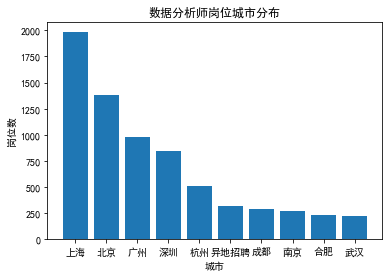

In [64]:
my_city = my["市级_工作地点"]
grp = my_city.value_counts()
grp.sort_values(ascending=True)
grp.index
plt.bar(range(10),grp[:10],tick_label=grp.index[:10])
plt.xlabel('城市')
plt.ylabel('岗位数')
plt.title('数据分析师岗位城市分布')
plt.show()

### 6.2 薪资总体分布

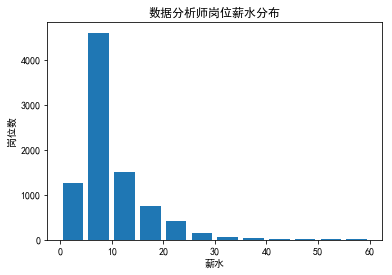

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
##设置rc参数显示中文标题
## 设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False ## 设置正常显示符号
salary = my["新_薪水"]
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60]
plt.hist(salary, bins, rwidth=0.8)
plt.xlabel('薪水')
plt.ylabel('岗位数')
plt.title('数据分析师岗位薪水分布')
plt.show()

### 6.3 城市薪资分布

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


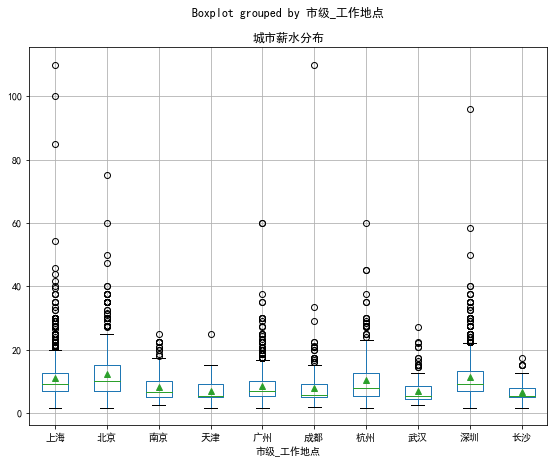

In [66]:
my_1=my[my[u"市级_工作地点"]==u"北京"]
my_2=my[my[u"市级_工作地点"]==u"上海"]
my_3=my[my[u"市级_工作地点"]==u"广州"]
my_4=my[my[u"市级_工作地点"]==u"深圳"]
my_5=my[my[u"市级_工作地点"]==u"武汉"]
my_6=my[my[u"市级_工作地点"]==u"成都"]
my_7=my[my[u"市级_工作地点"]==u"杭州"]
my_8=my[my[u"市级_工作地点"]==u"天津"]
my_9=my[my[u"市级_工作地点"]==u"南京"]
my_10=my[my[u"市级_工作地点"]==u"长沙"]
frames = [my_1,my_2,my_3,my_4,my_5,my_6,my_7,my_8,my_9,my_10]
result=pd.concat(frames)
##设置rc参数显示中文标题
## 设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False ## 设置正常显示符号
ax=result.boxplot(column='新_薪水',by='市级_工作地点',figsize=(9,7),showmeans=True)
plt.title("城市薪水分布")
#for label in ax.get_xticklabels():
#    label.set_fontproperties(zh_font)
plt.show()